In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import pickle
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
folder_a=r'C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/adulasa'
folder_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/alovera"
folder_c=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/giant_milkweed"
folder_d=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/Giloy"
folder_e=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/neem"
folder_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/Guava"
folder_g=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/tulasi"
folder_h=r"C:/Users/prati/OneDrive/Desktop/Medical_project/preprocessed/Argemone_mexicana"

In [3]:
#csv file for storing features extracted by BRISK
csv1_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_b.csv"
csv2_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_b.csv"
csv3_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giant_milkweed_b.csv"
csv4_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Giloy_b.csv"
csv5_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_b.csv"
csv6_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Guava_b.csv"
csv7_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulasi_b.csv"
csv8_b=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Argemone_mexicana_b.csv"

In [4]:
def feature_brisk(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(100,100)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #brisk code for feature descriptor
        brisk = cv2.BRISK_create()
        keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
        out=pd.DataFrame(descriptor)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [5]:
feature_brisk(folder_a,csv1_b)

descriptor shape  0  :  (21, 64)
descriptor shape  1  :  (35, 64)
descriptor shape  2  :  (37, 64)
descriptor shape  3  :  (107, 64)
descriptor shape  4  :  (46, 64)
descriptor shape  5  :  (17, 64)
descriptor shape  6  :  (94, 64)
descriptor shape  7  :  (63, 64)
descriptor shape  8  :  (100, 64)
descriptor shape  9  :  (39, 64)
descriptor shape  10  :  (42, 64)
descriptor shape  11  :  (35, 64)
descriptor shape  12  :  (32, 64)
descriptor shape  13  :  (28, 64)
descriptor shape  14  :  (38, 64)
descriptor shape  15  :  (25, 64)
descriptor shape  16  :  (84, 64)
descriptor shape  17  :  (30, 64)
descriptor shape  18  :  (30, 64)
descriptor shape  19  :  (34, 64)
descriptor shape  20  :  (31, 64)
descriptor shape  21  :  (31, 64)
descriptor shape  22  :  (32, 64)
descriptor shape  23  :  (30, 64)
descriptor shape  24  :  (38, 64)
descriptor shape  25  :  (39, 64)
descriptor shape  26  :  (36, 64)
descriptor shape  27  :  (34, 64)
descriptor shape  28  :  (124, 64)
descriptor shape  29 

In [6]:
feature_brisk(folder_b,csv2_b)

descriptor shape  0  :  (135, 64)
descriptor shape  1  :  (139, 64)
descriptor shape  2  :  (121, 64)
descriptor shape  3  :  (54, 64)
descriptor shape  4  :  (136, 64)
descriptor shape  5  :  (150, 64)
descriptor shape  6  :  (135, 64)
descriptor shape  7  :  (122, 64)
descriptor shape  8  :  (138, 64)
descriptor shape  9  :  (142, 64)
descriptor shape  10  :  (137, 64)
descriptor shape  11  :  (126, 64)
descriptor shape  12  :  (148, 64)
descriptor shape  13  :  (127, 64)
descriptor shape  14  :  (136, 64)
descriptor shape  15  :  (130, 64)
descriptor shape  16  :  (54, 64)
descriptor shape  17  :  (141, 64)
descriptor shape  18  :  (134, 64)
descriptor shape  19  :  (120, 64)
descriptor shape  20  :  (118, 64)
descriptor shape  21  :  (128, 64)
descriptor shape  22  :  (123, 64)
descriptor shape  23  :  (135, 64)
descriptor shape  24  :  (129, 64)
descriptor shape  25  :  (118, 64)
descriptor shape  26  :  (145, 64)
descriptor shape  27  :  (117, 64)
descriptor shape  28  :  (45, 64

In [7]:
feature_brisk(folder_c,csv3_b)

descriptor shape  0  :  (73, 64)
descriptor shape  1  :  (84, 64)
descriptor shape  2  :  (62, 64)
descriptor shape  3  :  (67, 64)
descriptor shape  4  :  (75, 64)
descriptor shape  5  :  (76, 64)
descriptor shape  6  :  (68, 64)
descriptor shape  7  :  (70, 64)
descriptor shape  8  :  (78, 64)
descriptor shape  9  :  (70, 64)
descriptor shape  10  :  (68, 64)
descriptor shape  11  :  (64, 64)
descriptor shape  12  :  (79, 64)
descriptor shape  13  :  (53, 64)
descriptor shape  14  :  (47, 64)
descriptor shape  15  :  (73, 64)
descriptor shape  16  :  (67, 64)
descriptor shape  17  :  (48, 64)
descriptor shape  18  :  (54, 64)
descriptor shape  19  :  (55, 64)
descriptor shape  20  :  (49, 64)
descriptor shape  21  :  (47, 64)
descriptor shape  22  :  (57, 64)
descriptor shape  23  :  (91, 64)
descriptor shape  24  :  (55, 64)
descriptor shape  25  :  (70, 64)
descriptor shape  26  :  (48, 64)
descriptor shape  27  :  (44, 64)
descriptor shape  28  :  (71, 64)
descriptor shape  29  : 

In [8]:
feature_brisk(folder_d,csv4_b)

descriptor shape  0  :  (37, 64)
descriptor shape  1  :  (47, 64)
descriptor shape  2  :  (45, 64)
descriptor shape  3  :  (60, 64)
descriptor shape  4  :  (48, 64)
descriptor shape  5  :  (48, 64)
descriptor shape  6  :  (44, 64)
descriptor shape  7  :  (45, 64)
descriptor shape  8  :  (40, 64)
descriptor shape  9  :  (45, 64)
descriptor shape  10  :  (43, 64)
descriptor shape  11  :  (52, 64)
descriptor shape  12  :  (62, 64)
descriptor shape  13  :  (45, 64)
descriptor shape  14  :  (41, 64)
descriptor shape  15  :  (39, 64)
descriptor shape  16  :  (56, 64)
descriptor shape  17  :  (49, 64)
descriptor shape  18  :  (50, 64)
descriptor shape  19  :  (42, 64)
descriptor shape  20  :  (47, 64)
descriptor shape  21  :  (33, 64)
descriptor shape  22  :  (51, 64)
descriptor shape  23  :  (69, 64)
descriptor shape  24  :  (38, 64)
descriptor shape  25  :  (40, 64)
descriptor shape  26  :  (42, 64)
descriptor shape  27  :  (40, 64)
descriptor shape  28  :  (52, 64)
descriptor shape  29  : 

In [9]:
feature_brisk(folder_e,csv5_b)

descriptor shape  0  :  (98, 64)
descriptor shape  1  :  (127, 64)
descriptor shape  2  :  (138, 64)
descriptor shape  3  :  (103, 64)
descriptor shape  4  :  (139, 64)
descriptor shape  5  :  (139, 64)
descriptor shape  6  :  (151, 64)
descriptor shape  7  :  (151, 64)
descriptor shape  8  :  (31, 64)
descriptor shape  9  :  (31, 64)
descriptor shape  10  :  (25, 64)
descriptor shape  11  :  (28, 64)
descriptor shape  12  :  (118, 64)
descriptor shape  13  :  (23, 64)
descriptor shape  14  :  (29, 64)
descriptor shape  15  :  (104, 64)
descriptor shape  16  :  (103, 64)
descriptor shape  17  :  (27, 64)
descriptor shape  18  :  (22, 64)
descriptor shape  19  :  (22, 64)
descriptor shape  20  :  (29, 64)
descriptor shape  21  :  (30, 64)
descriptor shape  22  :  (32, 64)
descriptor shape  23  :  (120, 64)
descriptor shape  24  :  (34, 64)
descriptor shape  25  :  (26, 64)
descriptor shape  26  :  (32, 64)
descriptor shape  27  :  (30, 64)
descriptor shape  28  :  (100, 64)
descriptor s

In [10]:
feature_brisk(folder_f,csv6_b)

descriptor shape  0  :  (71, 64)
descriptor shape  1  :  (33, 64)
descriptor shape  2  :  (61, 64)
descriptor shape  3  :  (95, 64)
descriptor shape  4  :  (56, 64)
descriptor shape  5  :  (59, 64)
descriptor shape  6  :  (56, 64)
descriptor shape  7  :  (52, 64)
descriptor shape  8  :  (62, 64)
descriptor shape  9  :  (57, 64)
descriptor shape  10  :  (67, 64)
descriptor shape  11  :  (52, 64)
descriptor shape  12  :  (25, 64)
descriptor shape  13  :  (55, 64)
descriptor shape  14  :  (61, 64)
descriptor shape  15  :  (81, 64)
descriptor shape  16  :  (74, 64)
descriptor shape  17  :  (51, 64)
descriptor shape  18  :  (51, 64)
descriptor shape  19  :  (50, 64)
descriptor shape  20  :  (50, 64)
descriptor shape  21  :  (48, 64)
descriptor shape  22  :  (43, 64)
descriptor shape  23  :  (31, 64)
descriptor shape  24  :  (43, 64)
descriptor shape  25  :  (39, 64)
descriptor shape  26  :  (20, 64)
descriptor shape  27  :  (27, 64)
descriptor shape  28  :  (82, 64)
descriptor shape  29  : 

In [11]:
feature_brisk(folder_g,csv7_b)

descriptor shape  0  :  (60, 64)
descriptor shape  1  :  (105, 64)
descriptor shape  2  :  (73, 64)
descriptor shape  3  :  (110, 64)
descriptor shape  4  :  (71, 64)
descriptor shape  5  :  (79, 64)
descriptor shape  6  :  (75, 64)
descriptor shape  7  :  (70, 64)
descriptor shape  8  :  (75, 64)
descriptor shape  9  :  (66, 64)
descriptor shape  10  :  (67, 64)
descriptor shape  11  :  (79, 64)
descriptor shape  12  :  (97, 64)
descriptor shape  13  :  (65, 64)
descriptor shape  14  :  (82, 64)
descriptor shape  15  :  (67, 64)
descriptor shape  16  :  (107, 64)
descriptor shape  17  :  (84, 64)
descriptor shape  18  :  (91, 64)
descriptor shape  19  :  (79, 64)
descriptor shape  20  :  (84, 64)
descriptor shape  21  :  (89, 64)
descriptor shape  22  :  (83, 64)
descriptor shape  23  :  (110, 64)
descriptor shape  24  :  (99, 64)
descriptor shape  25  :  (107, 64)
descriptor shape  26  :  (98, 64)
descriptor shape  27  :  (62, 64)
descriptor shape  28  :  (116, 64)
descriptor shape  

In [12]:
feature_brisk(folder_h,csv8_b)

descriptor shape  0  :  (26, 64)
descriptor shape  1  :  (46, 64)
descriptor shape  2  :  (60, 64)
descriptor shape  3  :  (42, 64)
descriptor shape  4  :  (60, 64)
descriptor shape  5  :  (50, 64)
descriptor shape  6  :  (50, 64)
descriptor shape  7  :  (56, 64)
descriptor shape  8  :  (56, 64)
descriptor shape  9  :  (54, 64)
descriptor shape  10  :  (54, 64)
descriptor shape  11  :  (63, 64)
descriptor shape  12  :  (46, 64)
descriptor shape  13  :  (63, 64)
descriptor shape  14  :  (57, 64)
descriptor shape  15  :  (26, 64)
descriptor shape  16  :  (42, 64)
descriptor shape  17  :  (57, 64)
descriptor shape  18  :  (67, 64)
descriptor shape  19  :  (67, 64)
descriptor shape  20  :  (60, 64)
descriptor shape  21  :  (60, 64)
descriptor shape  22  :  (72, 64)
descriptor shape  23  :  (41, 64)
descriptor shape  24  :  (72, 64)
descriptor shape  25  :  (68, 64)
descriptor shape  26  :  (68, 64)
descriptor shape  27  :  (52, 64)
descriptor shape  28  :  (53, 64)
descriptor shape  29  : 

In [13]:
data1_b = pd.read_csv(csv1_b,header=None,dtype='float64')


data1_b=data1_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,244.0,59.0,195.0,237.0,102.0,64.0,0.0,0.0,0.0,130.0,...,219.0,223.0,39.0,144.0,233.0,37.0,0.0,128.0,209.0,48.0
1,244.0,191.0,247.0,255.0,111.0,64.0,0.0,0.0,128.0,194.0,...,6.0,64.0,36.0,211.0,233.0,32.0,18.0,204.0,93.0,58.0
2,244.0,187.0,247.0,255.0,38.0,0.0,0.0,0.0,192.0,194.0,...,2.0,0.0,36.0,251.0,97.0,32.0,24.0,14.0,0.0,0.0
3,252.0,191.0,247.0,255.0,32.0,64.0,0.0,1.0,0.0,198.0,...,198.0,12.0,32.0,219.0,225.0,36.0,26.0,15.0,0.0,0.0
4,244.0,191.0,247.0,237.0,96.0,64.0,0.0,0.0,129.0,198.0,...,199.0,197.0,32.0,219.0,233.0,36.0,24.0,12.0,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,176.0,59.0,130.0,64.0,236.0,220.0,127.0,0.0,0.0,128.0,...,179.0,243.0,125.0,151.0,11.0,0.0,0.0,0.0,145.0,50.0
7985,180.0,123.0,199.0,225.0,252.0,223.0,1.0,1.0,129.0,206.0,...,177.0,249.0,126.0,135.0,2.0,0.0,0.0,136.0,153.0,51.0
7986,244.0,127.0,199.0,249.0,236.0,12.0,0.0,0.0,193.0,206.0,...,177.0,249.0,126.0,151.0,11.0,0.0,82.0,205.0,221.0,63.0
7987,176.0,123.0,130.0,224.0,236.0,220.0,57.0,0.0,128.0,128.0,...,51.0,35.0,1.0,252.0,191.0,219.0,127.0,28.0,0.0,0.0


In [14]:
data2_b = pd.read_csv(csv2_b,header=None,dtype='float64')


data2_b=data2_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,248.0,3.0,0.0,104.0,110.0,142.0,28.0,2.0,0.0,0.0,...,74.0,0.0,0.0,128.0,167.0,219.0,18.0,0.0,64.0,192.0
1,254.0,253.0,239.0,115.0,1.0,0.0,0.0,0.0,225.0,215.0,...,4.0,204.0,254.0,219.0,44.0,16.0,2.0,9.0,128.0,255.0
2,240.0,255.0,255.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,54.0,207.0,231.0,55.0,223.0,199.0,223.0,255.0
3,244.0,27.0,195.0,108.0,96.0,80.0,0.0,0.0,195.0,230.0,...,254.0,255.0,251.0,127.0,36.0,18.0,0.0,136.0,217.0,255.0
4,150.0,72.0,89.0,47.0,39.0,0.0,0.0,65.0,253.0,242.0,...,251.0,255.0,255.0,125.0,122.0,0.0,82.0,193.0,119.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22844,180.0,216.0,255.0,255.0,103.0,65.0,0.0,0.0,129.0,214.0,...,11.0,64.0,4.0,1.0,128.0,193.0,115.0,221.0,137.0,171.0
22845,180.0,123.0,192.0,104.0,228.0,220.0,121.0,0.0,0.0,128.0,...,92.0,60.0,223.0,111.0,54.0,158.0,132.0,62.0,185.0,50.0
22846,132.0,43.0,224.0,255.0,255.0,31.0,8.0,0.0,128.0,234.0,...,55.0,7.0,32.0,130.0,0.0,192.0,96.0,184.0,249.0,2.0
22847,148.0,255.0,207.0,241.0,237.0,192.0,1.0,0.0,128.0,130.0,...,176.0,252.0,255.0,55.0,18.0,136.0,118.0,8.0,128.0,137.0


In [15]:
data3_b = pd.read_csv(csv3_b,header=None,dtype='float64')


data3_b=data3_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,244.0,63.0,195.0,32.0,0.0,0.0,0.0,96.0,227.0,206.0,...,247.0,247.0,109.0,3.0,252.0,85.0,7.0,201.0,72.0,73.0
1,75.0,196.0,32.0,222.0,31.0,47.0,223.0,255.0,24.0,49.0,...,45.0,7.0,104.0,255.0,97.0,180.0,127.0,66.0,118.0,116.0
2,188.0,9.0,65.0,44.0,32.0,64.0,124.0,113.0,243.0,247.0,...,63.0,183.0,1.0,64.0,33.0,248.0,126.0,195.0,130.0,255.0
3,180.0,253.0,223.0,224.0,249.0,91.0,0.0,203.0,223.0,255.0,...,255.0,175.0,40.0,64.0,97.0,16.0,127.0,19.0,2.0,0.0
4,180.0,121.0,67.0,224.0,111.0,8.0,0.0,99.0,255.0,254.0,...,191.0,151.0,0.0,96.0,177.0,254.0,39.0,0.0,0.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,180.0,59.0,23.0,0.0,32.0,24.0,48.0,16.0,227.0,194.0,...,251.0,255.0,255.0,77.0,102.0,38.0,155.0,207.0,239.0,255.0
18170,180.0,123.0,207.0,3.0,224.0,208.0,33.0,119.0,7.0,0.0,...,0.0,0.0,4.0,129.0,197.0,247.0,27.0,195.0,66.0,64.0
18171,176.0,249.0,223.0,99.0,96.0,17.0,0.0,251.0,255.0,255.0,...,0.0,0.0,0.0,128.0,1.0,192.0,98.0,249.0,185.0,51.0
18172,128.0,123.0,0.0,0.0,136.0,220.0,123.0,0.0,128.0,0.0,...,253.0,243.0,253.0,255.0,127.0,62.0,159.0,15.0,9.0,138.0


In [16]:
data4_b = pd.read_csv(csv4_b,header=None,dtype='float64')


data4_b=data4_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data4_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,240.0,191.0,255.0,255.0,243.0,255.0,5.0,0.0,131.0,128.0,...,3.0,0.0,192.0,243.0,185.0,0.0,68.0,144.0,255.0,114.0
1,180.0,9.0,83.0,100.0,111.0,79.0,20.0,0.0,128.0,162.0,...,102.0,46.0,95.0,151.0,219.0,33.0,0.0,164.0,237.0,255.0
2,180.0,1.0,208.0,239.0,7.0,2.0,0.0,111.0,255.0,102.0,...,0.0,0.0,6.0,131.0,192.0,231.0,187.0,65.0,196.0,237.0
3,107.0,7.0,32.0,220.0,222.0,191.0,157.0,134.0,22.0,1.0,...,0.0,208.0,174.0,67.0,64.0,176.0,124.0,62.0,126.0,92.0
4,148.0,104.0,93.0,226.0,175.0,9.0,0.0,0.0,201.0,250.0,...,255.0,191.0,65.0,16.0,251.0,253.0,27.0,205.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,240.0,255.0,255.0,243.0,240.0,251.0,1.0,0.0,128.0,128.0,...,111.0,163.0,249.0,126.0,62.0,91.0,4.0,188.0,137.0,175.0
10993,75.0,128.0,184.0,255.0,159.0,39.0,134.0,128.0,220.0,32.0,...,7.0,2.0,193.0,32.0,152.0,201.0,0.0,187.0,59.0,27.0
10994,203.0,255.0,239.0,255.0,240.0,224.0,225.0,134.0,6.0,13.0,...,22.0,212.0,135.0,32.0,0.0,218.0,118.0,0.0,64.0,228.0
10995,180.0,11.0,209.0,108.0,238.0,223.0,28.0,0.0,129.0,0.0,...,0.0,248.0,142.0,45.0,1.0,218.0,126.0,12.0,4.0,204.0


In [17]:
data5_b = pd.read_csv(csv5_b,header=None,dtype='float64')


data5_b=data5_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data5_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4.0,64.0,28.0,175.0,143.0,7.0,7.0,12.0,220.0,48.0,...,4.0,12.0,6.0,1.0,224.0,117.0,31.0,12.0,0.0,204.0
1,176.0,255.0,255.0,243.0,233.0,193.0,0.0,3.0,3.0,0.0,...,192.0,253.0,62.0,3.0,64.0,0.0,2.0,225.0,241.0,35.0
2,0.0,114.0,159.0,131.0,193.0,145.0,99.0,127.0,12.0,0.0,...,6.0,0.0,148.0,239.0,119.0,54.0,205.0,115.0,50.0,48.0
3,254.0,141.0,123.0,36.0,32.0,0.0,128.0,241.0,251.0,227.0,...,206.0,80.0,134.0,9.0,4.0,6.0,251.0,255.0,12.0,9.0
4,15.0,192.0,124.0,191.0,7.0,3.0,6.0,136.0,253.0,249.0,...,66.0,80.0,182.0,75.0,64.0,180.0,255.0,223.0,31.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22288,75.0,134.0,176.0,31.0,16.0,32.0,236.0,176.0,32.0,129.0,...,130.0,76.0,234.0,195.0,36.0,5.0,195.0,136.0,24.0,49.0
22289,32.0,121.0,223.0,195.0,65.0,128.0,67.0,127.0,255.0,94.0,...,1.0,0.0,152.0,239.0,255.0,31.0,0.0,128.0,241.0,251.0
22290,148.0,11.0,85.0,45.0,0.0,0.0,64.0,32.0,225.0,194.0,...,6.0,212.0,38.0,249.0,225.0,180.0,0.0,0.0,193.0,98.0
22291,251.0,221.0,251.0,112.0,88.0,32.0,128.0,194.0,0.0,1.0,...,5.0,228.0,47.0,249.0,253.0,0.0,0.0,52.0,0.0,128.0


In [18]:
data6_b = pd.read_csv(csv6_b,header=None,dtype='float64')


data6_b=data6_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data6_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,214.0,255.0,239.0,179.0,0.0,0.0,0.0,192.0,231.0,207.0,...,220.0,220.0,7.0,0.0,0.0,0.0,114.0,157.0,8.0,139.0
1,121.0,1.0,0.0,12.0,14.0,190.0,126.0,0.0,0.0,0.0,...,159.0,209.0,160.0,67.0,32.0,223.0,127.0,8.0,16.0,32.0
2,235.0,7.0,0.0,0.0,8.0,60.0,248.0,242.0,96.0,0.0,...,32.0,40.0,223.0,7.0,22.0,203.0,0.0,192.0,127.0,127.0
3,240.0,19.0,247.0,239.0,242.0,247.0,127.0,0.0,128.0,128.0,...,0.0,216.0,151.0,105.0,182.0,91.0,125.0,24.0,0.0,0.0
4,1.0,3.0,144.0,15.0,0.0,128.0,109.0,48.0,32.0,0.0,...,0.0,0.0,252.0,75.0,116.0,255.0,173.0,123.0,123.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10486,180.0,59.0,0.0,96.0,12.0,200.0,120.0,0.0,160.0,134.0,...,255.0,119.0,8.0,254.0,239.0,22.0,147.0,73.0,153.0,255.0
10487,0.0,98.0,28.0,143.0,3.0,0.0,71.0,124.0,252.0,120.0,...,125.0,39.0,152.0,236.0,255.0,127.0,135.0,233.0,25.0,48.0
10488,52.0,88.0,223.0,231.0,47.0,65.0,2.0,107.0,235.0,214.0,...,0.0,40.0,223.0,255.0,126.0,255.0,31.0,138.0,91.0,58.0
10489,176.0,89.0,130.0,96.0,15.0,128.0,88.0,99.0,34.0,4.0,...,4.0,12.0,2.0,143.0,151.0,5.0,130.0,249.0,56.0,57.0


In [19]:
data7_b = pd.read_csv(csv7_b,header=None,dtype='float64')


data7_b=data7_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data7_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,150.0,0.0,16.0,4.0,14.0,14.0,0.0,0.0,240.0,255.0,...,67.0,0.0,32.0,255.0,237.0,0.0,0.0,0.0,0.0,0.0
1,176.0,27.0,211.0,109.0,0.0,0.0,0.0,0.0,227.0,0.0,...,208.0,255.0,255.0,253.0,31.0,14.0,147.0,9.0,0.0,0.0
2,0.0,123.0,0.0,200.0,140.0,12.0,25.0,68.0,0.0,204.0,...,255.0,255.0,1.0,0.0,0.0,192.0,34.0,185.0,0.0,137.0
3,240.0,27.0,211.0,96.0,74.0,0.0,0.0,99.0,227.0,70.0,...,255.0,255.0,187.0,12.0,254.0,95.0,19.0,0.0,0.0,201.0
4,31.0,0.0,0.0,14.0,0.0,31.0,126.0,24.0,24.0,255.0,...,56.0,48.0,140.0,1.0,0.0,253.0,255.0,201.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16989,148.0,126.0,207.0,227.0,225.0,217.0,35.0,95.0,239.0,10.0,...,115.0,3.0,144.0,238.0,1.0,164.0,255.0,255.0,63.0,4.0
16990,132.0,126.0,77.0,1.0,0.0,0.0,0.0,112.0,224.0,200.0,...,1.0,0.0,144.0,236.0,55.0,158.0,255.0,255.0,191.0,191.0
16991,32.0,121.0,223.0,231.0,235.0,129.0,3.0,111.0,0.0,4.0,...,1.0,3.0,17.0,52.0,255.0,255.0,255.0,207.0,11.0,171.0
16992,132.0,127.0,4.0,129.0,0.0,0.0,64.0,32.0,228.0,128.0,...,0.0,128.0,150.0,237.0,183.0,254.0,255.0,223.0,159.0,191.0


In [20]:
data8_b = pd.read_csv(csv8_b,header=None,dtype='float64')


data8_b=data8_b.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data8_b

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,244.0,255.0,239.0,255.0,103.0,64.0,0.0,0.0,0.0,194.0,...,0.0,72.0,174.0,235.0,64.0,0.0,0.0,0.0,0.0,0.0
1,212.0,11.0,241.0,255.0,47.0,6.0,0.0,0.0,128.0,192.0,...,68.0,64.0,172.0,235.0,64.0,0.0,0.0,0.0,0.0,0.0
2,180.0,255.0,239.0,227.0,32.0,0.0,0.0,0.0,193.0,194.0,...,129.0,64.0,252.0,203.0,64.0,0.0,0.0,0.0,0.0,0.0
3,240.0,255.0,239.0,225.0,96.0,0.0,0.0,64.0,194.0,64.0,...,129.0,208.0,254.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0
4,252.0,11.0,241.0,125.0,118.0,70.0,4.0,0.0,128.0,226.0,...,192.0,72.0,104.0,215.0,65.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11199,132.0,35.0,223.0,239.0,226.0,211.0,37.0,23.0,23.0,42.0,...,255.0,119.0,249.0,254.0,36.0,182.0,255.0,255.0,239.0,239.0
11200,148.0,72.0,221.0,47.0,3.0,0.0,0.0,96.0,249.0,242.0,...,22.0,12.0,242.0,235.0,0.0,0.0,128.0,243.0,238.0,207.0
11201,176.0,25.0,219.0,228.0,239.0,143.0,0.0,67.0,67.0,230.0,...,0.0,0.0,0.0,239.0,225.0,48.0,78.0,255.0,255.0,53.0
11202,132.0,59.0,215.0,13.0,0.0,192.0,101.0,55.0,183.0,46.0,...,127.0,20.0,0.0,204.0,231.0,54.0,223.0,223.0,238.0,255.0


In [21]:
print(type(data1_b))
print(type(data2_b))
print(type(data3_b))
print(type(data4_b))
print(type(data5_b))
print(type(data6_b))
print(type(data7_b))
print(type(data8_b))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
data_b = pd.concat([data1_b, data2_b,data3_b,data4_b,data5_b,data6_b,data7_b, data8_b])


print(data_b)


          0      1      2      3      4      5      6     7      8      9   \
0      244.0   59.0  195.0  237.0  102.0   64.0    0.0   0.0    0.0  130.0   
1      244.0  191.0  247.0  255.0  111.0   64.0    0.0   0.0  128.0  194.0   
2      244.0  187.0  247.0  255.0   38.0    0.0    0.0   0.0  192.0  194.0   
3      252.0  191.0  247.0  255.0   32.0   64.0    0.0   1.0    0.0  198.0   
4      244.0  191.0  247.0  237.0   96.0   64.0    0.0   0.0  129.0  198.0   
...      ...    ...    ...    ...    ...    ...    ...   ...    ...    ...   
11199  132.0   35.0  223.0  239.0  226.0  211.0   37.0  23.0   23.0   42.0   
11200  148.0   72.0  221.0   47.0    3.0    0.0    0.0  96.0  249.0  242.0   
11201  176.0   25.0  219.0  228.0  239.0  143.0    0.0  67.0   67.0  230.0   
11202  132.0   59.0  215.0   13.0    0.0  192.0  101.0  55.0  183.0   46.0   
11203  148.0   72.0  201.0  175.0   39.0    7.0    0.0  64.0  249.0  242.0   

       ...     54     55     56     57     58     59     60    

In [23]:
ta=data_b.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/BRISK_Final.csv', mode='a', header=False,index=False)

## ELBOW METHOD FOR BRISK

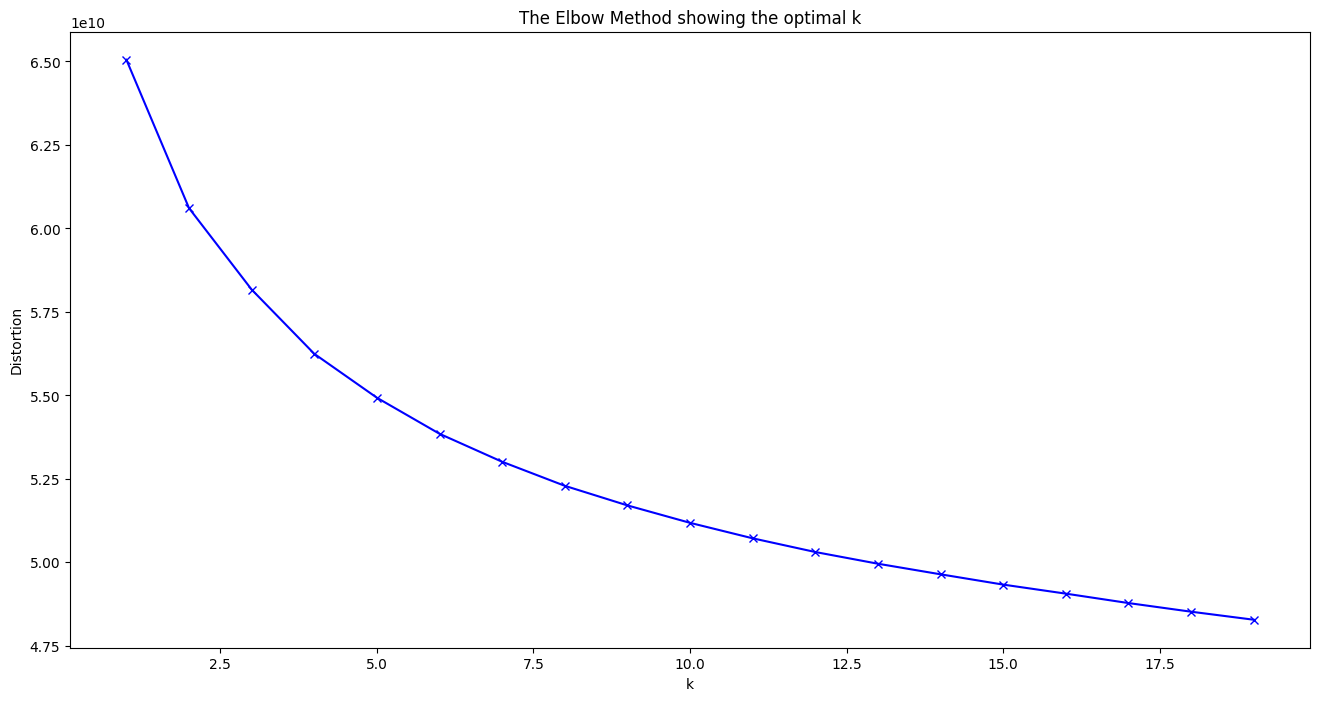

In [24]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(data_b)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## KMEANS  BRISK 

In [25]:
kmeans = KMeans(n_clusters=16,n_init=10)
kmeans.fit(data_b)

KMeans(n_clusters=16, n_init=10)

In [26]:
import pickle

In [27]:
# save the model to disk
filename = 'Kmeans_BRISK_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [28]:
import os

# Define the filename used for saving the model
filename = 'Kmeans_BRISK_Model.sav'

# Get the current working directory
current_directory = os.getcwd()

# Combine the current directory with the filename to get the full path
full_path = os.path.join(current_directory, filename)

# Print the full path to the saved model
print("Model saved at:", full_path)


Model saved at: C:\Users\prati\Kmeans_BRISK_Model.sav


In [29]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 7551,  7361,  7152,  8105,  7630,  6808,  7189,  6970,  6519,
        6982,  7370, 10730,  7102,  6494,  7613,  9415], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])) 



In [30]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model

#initialising i=0; as its the 1st class

i=0
data=[]
c=0

for filename in os.listdir(folder_a):
    #path
    path=os.path.join(folder_a,filename)
    a=cv2.imread(path)

    #resize image
    resize=(100, 100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",c," : ", len(keypoint))
    c=c+1
    if c==2000:
        break
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = 0
csv_data=Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_Prediction_B.csv', mode='a',header=False,index=False)



keypoint length  0  :  21
keypoint length  1  :  35
keypoint length  2  :  37
keypoint length  3  :  107
keypoint length  4  :  46
keypoint length  5  :  17
keypoint length  6  :  94
keypoint length  7  :  63
keypoint length  8  :  100
keypoint length  9  :  39
keypoint length  10  :  42
keypoint length  11  :  35
keypoint length  12  :  32
keypoint length  13  :  28
keypoint length  14  :  38
keypoint length  15  :  25
keypoint length  16  :  84
keypoint length  17  :  30
keypoint length  18  :  30
keypoint length  19  :  34
keypoint length  20  :  31
keypoint length  21  :  31
keypoint length  22  :  32
keypoint length  23  :  30
keypoint length  24  :  38
keypoint length  25  :  39
keypoint length  26  :  36
keypoint length  27  :  34
keypoint length  28  :  124
keypoint length  29  :  23
keypoint length  30  :  24
keypoint length  31  :  29
keypoint length  32  :  25
keypoint length  33  :  29
keypoint length  34  :  25
keypoint length  35  :  36
keypoint length  36  :  27
keypoint

In [31]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder_b):
    path=os.path.join(folder_b,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_Prediction_B.csv', mode='a',header=False,index=False)



keypoint length  0  :  135
keypoint length  1  :  139
keypoint length  2  :  121
keypoint length  3  :  54
keypoint length  4  :  136
keypoint length  5  :  150
keypoint length  6  :  135
keypoint length  7  :  122
keypoint length  8  :  138
keypoint length  9  :  142
keypoint length  10  :  137
keypoint length  11  :  126
keypoint length  12  :  148
keypoint length  13  :  127
keypoint length  14  :  136
keypoint length  15  :  130
keypoint length  16  :  54
keypoint length  17  :  141
keypoint length  18  :  134
keypoint length  19  :  120
keypoint length  20  :  118
keypoint length  21  :  128
keypoint length  22  :  123
keypoint length  23  :  135
keypoint length  24  :  129
keypoint length  25  :  118
keypoint length  26  :  145
keypoint length  27  :  117
keypoint length  28  :  45
keypoint length  29  :  151
keypoint length  30  :  153
keypoint length  31  :  136
keypoint length  32  :  125
keypoint length  33  :  119
keypoint length  34  :  120
keypoint length  35  :  134
keypo

In [32]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=0
for filename in os.listdir(folder_c):
    path=os.path.join(folder_c,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/gm_Prediction_B.csv', mode='a',header=False,index=False)



keypoint length  0  :  73
keypoint length  1  :  84
keypoint length  2  :  62
keypoint length  3  :  67
keypoint length  4  :  75
keypoint length  5  :  76
keypoint length  6  :  68
keypoint length  7  :  70
keypoint length  8  :  78
keypoint length  9  :  70
keypoint length  10  :  68
keypoint length  11  :  64
keypoint length  12  :  79
keypoint length  13  :  53
keypoint length  14  :  47
keypoint length  15  :  73
keypoint length  16  :  67
keypoint length  17  :  48
keypoint length  18  :  54
keypoint length  19  :  55
keypoint length  20  :  49
keypoint length  21  :  47
keypoint length  22  :  57
keypoint length  23  :  91
keypoint length  24  :  55
keypoint length  25  :  70
keypoint length  26  :  48
keypoint length  27  :  44
keypoint length  28  :  71
keypoint length  29  :  47
keypoint length  30  :  49
keypoint length  31  :  45
keypoint length  32  :  45
keypoint length  33  :  49
keypoint length  34  :  73
keypoint length  35  :  49
keypoint length  36  :  48
keypoint le

In [33]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=3
data=[]
k=0
for filename in os.listdir(folder_d):
    path=os.path.join(folder_d,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giloy_Prediction_B.csv', mode='a',header=False,index=False)


keypoint length  0  :  37
keypoint length  1  :  47
keypoint length  2  :  45
keypoint length  3  :  60
keypoint length  4  :  48
keypoint length  5  :  48
keypoint length  6  :  44
keypoint length  7  :  45
keypoint length  8  :  40
keypoint length  9  :  45
keypoint length  10  :  43
keypoint length  11  :  52
keypoint length  12  :  62
keypoint length  13  :  45
keypoint length  14  :  41
keypoint length  15  :  39
keypoint length  16  :  56
keypoint length  17  :  49
keypoint length  18  :  50
keypoint length  19  :  42
keypoint length  20  :  47
keypoint length  21  :  33
keypoint length  22  :  51
keypoint length  23  :  69
keypoint length  24  :  38
keypoint length  25  :  40
keypoint length  26  :  42
keypoint length  27  :  40
keypoint length  28  :  52
keypoint length  29  :  35
keypoint length  30  :  34
keypoint length  31  :  38
keypoint length  32  :  41
keypoint length  33  :  47
keypoint length  34  :  39
keypoint length  35  :  42
keypoint length  36  :  49
keypoint le

In [34]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=4
data=[]
k=0
for filename in os.listdir(folder_e):
    path=os.path.join(folder_e,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_Prediction_B.csv', mode='a',header=False,index=False)



keypoint length  0  :  98
keypoint length  1  :  127
keypoint length  2  :  138
keypoint length  3  :  103
keypoint length  4  :  139
keypoint length  5  :  139
keypoint length  6  :  151
keypoint length  7  :  151
keypoint length  8  :  31
keypoint length  9  :  31
keypoint length  10  :  25
keypoint length  11  :  28
keypoint length  12  :  118
keypoint length  13  :  23
keypoint length  14  :  29
keypoint length  15  :  104
keypoint length  16  :  103
keypoint length  17  :  27
keypoint length  18  :  22
keypoint length  19  :  22
keypoint length  20  :  29
keypoint length  21  :  30
keypoint length  22  :  32
keypoint length  23  :  120
keypoint length  24  :  34
keypoint length  25  :  26
keypoint length  26  :  32
keypoint length  27  :  30
keypoint length  28  :  100
keypoint length  29  :  30
keypoint length  30  :  36
keypoint length  31  :  36
keypoint length  32  :  32
keypoint length  33  :  34
keypoint length  34  :  84
keypoint length  35  :  36
keypoint length  36  :  40

In [35]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=5
data=[]
k=0
for filename in os.listdir(folder_f):
    path=os.path.join(folder_f,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/guava_Prediction_B.csv', mode='a',header=False,index=False)


keypoint length  0  :  71
keypoint length  1  :  33
keypoint length  2  :  61
keypoint length  3  :  95
keypoint length  4  :  56
keypoint length  5  :  59
keypoint length  6  :  56
keypoint length  7  :  52
keypoint length  8  :  62
keypoint length  9  :  57
keypoint length  10  :  67
keypoint length  11  :  52
keypoint length  12  :  25
keypoint length  13  :  55
keypoint length  14  :  61
keypoint length  15  :  81
keypoint length  16  :  74
keypoint length  17  :  51
keypoint length  18  :  51
keypoint length  19  :  50
keypoint length  20  :  50
keypoint length  21  :  48
keypoint length  22  :  43
keypoint length  23  :  31
keypoint length  24  :  43
keypoint length  25  :  39
keypoint length  26  :  20
keypoint length  27  :  27
keypoint length  28  :  82
keypoint length  29  :  31
keypoint length  30  :  30
keypoint length  31  :  27
keypoint length  32  :  28
keypoint length  33  :  32
keypoint length  34  :  64
keypoint length  35  :  27
keypoint length  36  :  31
keypoint le

In [36]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=6
data=[]
k=0
for filename in os.listdir(folder_g):
    path=os.path.join(folder_g,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulsi_Prediction_B.csv', mode='a',header=False,index=False)


keypoint length  0  :  60
keypoint length  1  :  105
keypoint length  2  :  73
keypoint length  3  :  110
keypoint length  4  :  71
keypoint length  5  :  79
keypoint length  6  :  75
keypoint length  7  :  70
keypoint length  8  :  75
keypoint length  9  :  66
keypoint length  10  :  67
keypoint length  11  :  79
keypoint length  12  :  97
keypoint length  13  :  65
keypoint length  14  :  82
keypoint length  15  :  67
keypoint length  16  :  107
keypoint length  17  :  84
keypoint length  18  :  91
keypoint length  19  :  79
keypoint length  20  :  84
keypoint length  21  :  89
keypoint length  22  :  83
keypoint length  23  :  110
keypoint length  24  :  99
keypoint length  25  :  107
keypoint length  26  :  98
keypoint length  27  :  62
keypoint length  28  :  116
keypoint length  29  :  101
keypoint length  30  :  82
keypoint length  31  :  72
keypoint length  32  :  76
keypoint length  33  :  80
keypoint length  34  :  62
keypoint length  35  :  81
keypoint length  36  :  75
keyp

In [37]:
#performing kmeans prediction of the entire dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=7
data=[]
k=0
for filename in os.listdir(folder_h):
    path=os.path.join(folder_h,filename)
    a=cv2.imread(path)
    resize=(100, 100)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
     # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
        
    out=pd.DataFrame(descriptor)
    #predict values of feature vector with pretrained kmeans
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoint))
    print("keypoint length ",k," : ", len(keypoint))
    k=k+1
    if k==2000:
        break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/am_Prediction_B.csv', mode='a',header=False,index=False)


keypoint length  0  :  26
keypoint length  1  :  46
keypoint length  2  :  60
keypoint length  3  :  42
keypoint length  4  :  60
keypoint length  5  :  50
keypoint length  6  :  50
keypoint length  7  :  56
keypoint length  8  :  56
keypoint length  9  :  54
keypoint length  10  :  54
keypoint length  11  :  63
keypoint length  12  :  46
keypoint length  13  :  63
keypoint length  14  :  57
keypoint length  15  :  26
keypoint length  16  :  42
keypoint length  17  :  57
keypoint length  18  :  67
keypoint length  19  :  67
keypoint length  20  :  60
keypoint length  21  :  60
keypoint length  22  :  72
keypoint length  23  :  41
keypoint length  24  :  72
keypoint length  25  :  68
keypoint length  26  :  68
keypoint length  27  :  52
keypoint length  28  :  53
keypoint length  29  :  52
keypoint length  30  :  51
keypoint length  31  :  51
keypoint length  32  :  53
keypoint length  33  :  53
keypoint length  34  :  52
keypoint length  35  :  49
keypoint length  36  :  49
keypoint le

In [38]:
print("Adulasa")
dat1_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_Prediction_B.csv",header=None)
print(dat1_B)

Adulasa
           0         1         2         3         4         5         6   \
0    0.142857  0.000000  0.000000  0.428571  0.047619  0.000000  0.047619   
1    0.057143  0.085714  0.085714  0.000000  0.000000  0.200000  0.000000   
2    0.027027  0.027027  0.000000  0.081081  0.000000  0.027027  0.000000   
3    0.056075  0.046729  0.028037  0.093458  0.102804  0.018692  0.065421   
4    0.021739  0.043478  0.065217  0.239130  0.021739  0.043478  0.043478   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.068966  0.103448  0.103448  0.172414  0.000000  0.103448  0.000000   
216  0.107143  0.071429  0.107143  0.107143  0.000000  0.071429  0.000000   
217  0.034483  0.137931  0.103448  0.137931  0.000000  0.137931  0.000000   
218  0.068966  0.034483  0.172414  0.172414  0.000000  0.068966  0.000000   
219  0.055556  0.000000  0.166667  0.138889  0.000000  0.055556  0.000000   

           7         8         9         10        11        12    

In [39]:
print("Alovera")
dat2_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_Prediction_B.csv",header=None)
print(dat2_B)

Alovera
           0         1         2         3         4         5         6   \
0    0.037037  0.037037  0.096296  0.066667  0.081481  0.014815  0.066667   
1    0.035971  0.028777  0.064748  0.107914  0.093525  0.014388  0.043165   
2    0.066116  0.008264  0.082645  0.099174  0.099174  0.000000  0.033058   
3    0.055556  0.018519  0.185185  0.037037  0.055556  0.018519  0.055556   
4    0.044118  0.022059  0.058824  0.110294  0.088235  0.022059  0.051471   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.053435  0.030534  0.015267  0.122137  0.076336  0.045802  0.038168   
216  0.039062  0.015625  0.101562  0.039062  0.062500  0.007812  0.078125   
217  0.022556  0.007519  0.105263  0.037594  0.127820  0.052632  0.067669   
218  0.016529  0.033058  0.115702  0.090909  0.107438  0.033058  0.041322   
219  0.038462  0.038462  0.076923  0.092308  0.046154  0.046154  0.030769   

           7         8         9         10        11        12    

In [40]:
print("GM")
dat3_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/gm_Prediction_B.csv",header=None)
print(dat3_B)

GM
           0         1         2         3         4         5         6   \
0    0.164384  0.054795  0.000000  0.068493  0.054795  0.041096  0.054795   
1    0.142857  0.011905  0.059524  0.035714  0.095238  0.083333  0.023810   
2    0.032258  0.112903  0.048387  0.096774  0.096774  0.064516  0.080645   
3    0.179104  0.014925  0.000000  0.089552  0.044776  0.089552  0.014925   
4    0.066667  0.053333  0.080000  0.093333  0.040000  0.093333  0.080000   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.032787  0.081967  0.000000  0.081967  0.098361  0.049180  0.065574   
216  0.125000  0.092105  0.032895  0.059211  0.085526  0.059211  0.078947   
217  0.034091  0.056818  0.034091  0.090909  0.090909  0.102273  0.045455   
218  0.014493  0.086957  0.043478  0.101449  0.086957  0.072464  0.086957   
219  0.050847  0.101695  0.000000  0.033898  0.084746  0.186441  0.033898   

           7         8         9         10        11        12        1

In [41]:
print("Giloy")
dat4_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giloy_Prediction_B.csv",header=None)
print(dat4_B)

Giloy
           0         1         2         3         4         5         6   \
0    0.054054  0.054054  0.108108  0.027027  0.054054  0.027027  0.000000   
1    0.085106  0.000000  0.063830  0.021277  0.000000  0.021277  0.000000   
2    0.022222  0.044444  0.044444  0.111111  0.111111  0.066667  0.111111   
3    0.100000  0.066667  0.066667  0.083333  0.016667  0.033333  0.066667   
4    0.020833  0.083333  0.104167  0.083333  0.062500  0.020833  0.062500   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.045455  0.090909  0.045455  0.030303  0.045455  0.045455  0.090909   
216  0.052632  0.105263  0.035088  0.052632  0.035088  0.035088  0.017544   
217  0.088235  0.088235  0.014706  0.044118  0.000000  0.058824  0.044118   
218  0.076923  0.076923  0.030769  0.046154  0.046154  0.061538  0.015385   
219  0.055556  0.129630  0.055556  0.074074  0.055556  0.037037  0.018519   

           7         8         9         10        11        12      

In [42]:
print("Neem")
dat5_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_Prediction_B.csv",header=None)
print(dat5_B)

Neem
           0         1         2         3         4         5         6   \
0    0.132653  0.122449  0.030612  0.040816  0.030612  0.051020  0.081633   
1    0.078740  0.094488  0.031496  0.055118  0.039370  0.047244  0.031496   
2    0.043478  0.137681  0.036232  0.028986  0.014493  0.086957  0.079710   
3    0.048544  0.116505  0.038835  0.048544  0.058252  0.077670  0.106796   
4    0.064748  0.143885  0.028777  0.028777  0.035971  0.071942  0.057554   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.064286  0.085714  0.028571  0.057143  0.028571  0.071429  0.085714   
216  0.064286  0.085714  0.028571  0.057143  0.028571  0.071429  0.085714   
217  0.037313  0.141791  0.037313  0.067164  0.014925  0.052239  0.089552   
218  0.037313  0.141791  0.037313  0.067164  0.014925  0.052239  0.089552   
219  0.043478  0.137681  0.036232  0.028986  0.014493  0.086957  0.079710   

           7         8         9         10        11        12       

In [43]:
print("Guava")
dat6_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/guava_Prediction_B.csv",header=None)
print(dat6_B)

Guava
           0         1         2         3         4         5         6   \
0    0.056338  0.084507  0.000000  0.098592  0.056338  0.070423  0.070423   
1    0.000000  0.060606  0.121212  0.000000  0.090909  0.030303  0.000000   
2    0.098361  0.049180  0.081967  0.114754  0.000000  0.081967  0.081967   
3    0.063158  0.042105  0.073684  0.115789  0.031579  0.021053  0.042105   
4    0.071429  0.017857  0.035714  0.089286  0.017857  0.089286  0.053571   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.024096  0.084337  0.012048  0.072289  0.036145  0.048193  0.060241   
216  0.036364  0.054545  0.072727  0.072727  0.018182  0.036364  0.054545   
217  0.035088  0.035088  0.035088  0.070175  0.000000  0.070175  0.052632   
218  0.084746  0.050847  0.050847  0.033898  0.067797  0.101695  0.016949   
219  0.000000  0.035088  0.070175  0.122807  0.035088  0.087719  0.035088   

           7         8         9         10        11        12      

In [44]:
print("Tulasi")
dat7_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulsi_Prediction_B.csv",header=None)
print(dat7_B)

Tulasi
           0         1         2         3         4         5         6   \
0    0.033333  0.066667  0.000000  0.016667  0.116667  0.050000  0.083333   
1    0.066667  0.019048  0.038095  0.104762  0.123810  0.019048  0.066667   
2    0.041096  0.027397  0.136986  0.041096  0.068493  0.095890  0.082192   
3    0.036364  0.154545  0.054545  0.063636  0.054545  0.027273  0.090909   
4    0.070423  0.028169  0.056338  0.126761  0.126761  0.000000  0.056338   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.075758  0.015152  0.075758  0.060606  0.090909  0.090909  0.090909   
216  0.026667  0.053333  0.120000  0.133333  0.040000  0.066667  0.040000   
217  0.031746  0.000000  0.063492  0.095238  0.095238  0.031746  0.047619   
218  0.075949  0.037975  0.063291  0.088608  0.075949  0.050633  0.050633   
219  0.065789  0.052632  0.052632  0.092105  0.078947  0.052632  0.026316   

           7         8         9         10        11        12     

In [45]:
print("AM")
dat8_B = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/am_Prediction_B.csv",header=None)
print(dat8_B)

AM
           0         1         2         3         4         5         6   \
0    0.115385  0.076923  0.038462  0.269231  0.000000  0.038462  0.115385   
1    0.065217  0.065217  0.086957  0.021739  0.021739  0.173913  0.000000   
2    0.000000  0.033333  0.066667  0.066667  0.050000  0.050000  0.033333   
3    0.023810  0.047619  0.023810  0.023810  0.071429  0.023810  0.000000   
4    0.000000  0.033333  0.066667  0.066667  0.050000  0.050000  0.033333   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.000000  0.040000  0.080000  0.060000  0.040000  0.040000  0.040000   
216  0.000000  0.018519  0.037037  0.018519  0.055556  0.037037  0.037037   
217  0.000000  0.018519  0.037037  0.018519  0.055556  0.037037  0.037037   
218  0.000000  0.070175  0.087719  0.017544  0.087719  0.035088  0.035088   
219  0.000000  0.070175  0.087719  0.017544  0.087719  0.035088  0.035088   

           7         8         9         10        11        12        1

In [46]:
A=pd.concat([dat1_B, dat2_B, dat3_B, dat4_B, dat5_B, dat6_B, dat7_B, dat8_B])
csv_data=A.to_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalBRISK.csv", mode='a',header=False,index=False)

In [47]:
brisk = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalBRISK.csv",header=None)
brisk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.142857,0.000000,0.000000,0.428571,0.047619,0.000000,0.047619,0.190476,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.095238,0
1,0.057143,0.085714,0.085714,0.000000,0.000000,0.200000,0.000000,0.114286,0.000000,0.000000,0.057143,0.285714,0.028571,0.057143,0.000000,0.028571,0
2,0.027027,0.027027,0.000000,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.000000,0.027027,0.459459,0.000000,0.027027,0.000000,0.270270,0
3,0.056075,0.046729,0.028037,0.093458,0.102804,0.018692,0.065421,0.140187,0.000000,0.093458,0.037383,0.046729,0.056075,0.093458,0.056075,0.065421,0
4,0.021739,0.043478,0.065217,0.239130,0.021739,0.043478,0.043478,0.043478,0.086957,0.000000,0.043478,0.130435,0.021739,0.086957,0.021739,0.086957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.000000,0.040000,0.080000,0.060000,0.040000,0.040000,0.040000,0.000000,0.080000,0.020000,0.160000,0.180000,0.200000,0.000000,0.020000,0.040000,7
1756,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,0.092593,0.240741,0.148148,0.055556,0.000000,0.055556,7
1757,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,0.092593,0.240741,0.148148,0.055556,0.000000,0.055556,7
1758,0.000000,0.070175,0.087719,0.017544,0.087719,0.035088,0.035088,0.000000,0.175439,0.035088,0.070175,0.192982,0.157895,0.000000,0.000000,0.035088,7


# SIFT

In [48]:
#csv file for storing features extracted by BRISK
csv1_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_f.csv"
csv2_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_f.csv"
csv3_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giant_milkweed_f.csv"
csv4_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Giloy_f.csv"
csv5_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_f.csv"
csv6_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Guava_f.csv"
csv7_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulasi_f.csv"
csv8_f=r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Argemone_mexicana_f.csv"

In [49]:
def feature_freak(folder_name, csv_dest):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(150,150)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
        # creating a Histograms Equalization of a image using cv2.equalizeHist()
        equ = cv2.equalizeHist(img2)
        
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #keypoints
        sift = cv2.SIFT_create()
        keypoints, d = sift.detectAndCompute(gray, None)
        
        #initialise descriptor
        sift = cv2.xfeatures2d.SIFT_create()
        k,descriptors= sift.compute(gray,keypoints)
        
        out=pd.DataFrame(descriptors)
        #convert the descriptor array into a dataframe format
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        if i==2000:
            break

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file
        csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [50]:
feature_freak(folder_a,csv1_f)

descriptor shape  0  :  (26, 128)
descriptor shape  1  :  (12, 128)
descriptor shape  2  :  (25, 128)
descriptor shape  3  :  (27, 128)
descriptor shape  4  :  (34, 128)
descriptor shape  5  :  (25, 128)
descriptor shape  6  :  (27, 128)
descriptor shape  7  :  (31, 128)
descriptor shape  8  :  (37, 128)
descriptor shape  9  :  (31, 128)
descriptor shape  10  :  (27, 128)
descriptor shape  11  :  (30, 128)
descriptor shape  12  :  (14, 128)
descriptor shape  13  :  (19, 128)
descriptor shape  14  :  (15, 128)
descriptor shape  15  :  (22, 128)
descriptor shape  16  :  (37, 128)
descriptor shape  17  :  (17, 128)
descriptor shape  18  :  (15, 128)
descriptor shape  19  :  (15, 128)
descriptor shape  20  :  (25, 128)
descriptor shape  21  :  (17, 128)
descriptor shape  22  :  (17, 128)
descriptor shape  23  :  (12, 128)
descriptor shape  24  :  (19, 128)
descriptor shape  25  :  (21, 128)
descriptor shape  26  :  (21, 128)
descriptor shape  27  :  (20, 128)
descriptor shape  28  :  (28, 

In [51]:
feature_freak(folder_b,csv2_f)

descriptor shape  0  :  (11, 128)
descriptor shape  1  :  (9, 128)
descriptor shape  2  :  (26, 128)
descriptor shape  3  :  (19, 128)
descriptor shape  4  :  (32, 128)
descriptor shape  5  :  (27, 128)
descriptor shape  6  :  (22, 128)
descriptor shape  7  :  (32, 128)
descriptor shape  8  :  (24, 128)
descriptor shape  9  :  (23, 128)
descriptor shape  10  :  (33, 128)
descriptor shape  11  :  (24, 128)
descriptor shape  12  :  (10, 128)
descriptor shape  13  :  (27, 128)
descriptor shape  14  :  (25, 128)
descriptor shape  15  :  (11, 128)
descriptor shape  16  :  (26, 128)
descriptor shape  17  :  (11, 128)
descriptor shape  18  :  (10, 128)
descriptor shape  19  :  (7, 128)
descriptor shape  20  :  (10, 128)
descriptor shape  21  :  (26, 128)
descriptor shape  22  :  (30, 128)
descriptor shape  23  :  (10, 128)
descriptor shape  24  :  (29, 128)
descriptor shape  25  :  (26, 128)
descriptor shape  26  :  (22, 128)
descriptor shape  27  :  (27, 128)
descriptor shape  28  :  (29, 12

In [52]:
feature_freak(folder_c,csv3_f)

descriptor shape  0  :  (37, 128)
descriptor shape  1  :  (28, 128)
descriptor shape  2  :  (29, 128)
descriptor shape  3  :  (45, 128)
descriptor shape  4  :  (38, 128)
descriptor shape  5  :  (38, 128)
descriptor shape  6  :  (42, 128)
descriptor shape  7  :  (36, 128)
descriptor shape  8  :  (39, 128)
descriptor shape  9  :  (32, 128)
descriptor shape  10  :  (28, 128)
descriptor shape  11  :  (34, 128)
descriptor shape  12  :  (29, 128)
descriptor shape  13  :  (37, 128)
descriptor shape  14  :  (44, 128)
descriptor shape  15  :  (37, 128)
descriptor shape  16  :  (45, 128)
descriptor shape  17  :  (34, 128)
descriptor shape  18  :  (33, 128)
descriptor shape  19  :  (36, 128)
descriptor shape  20  :  (39, 128)
descriptor shape  21  :  (31, 128)
descriptor shape  22  :  (37, 128)
descriptor shape  23  :  (28, 128)
descriptor shape  24  :  (46, 128)
descriptor shape  25  :  (45, 128)
descriptor shape  26  :  (38, 128)
descriptor shape  27  :  (30, 128)
descriptor shape  28  :  (47, 

In [53]:
feature_freak(folder_d,csv4_f)

descriptor shape  0  :  (14, 128)
descriptor shape  1  :  (27, 128)
descriptor shape  2  :  (16, 128)
descriptor shape  3  :  (12, 128)
descriptor shape  4  :  (22, 128)
descriptor shape  5  :  (20, 128)
descriptor shape  6  :  (24, 128)
descriptor shape  7  :  (26, 128)
descriptor shape  8  :  (24, 128)
descriptor shape  9  :  (25, 128)
descriptor shape  10  :  (20, 128)
descriptor shape  11  :  (29, 128)
descriptor shape  12  :  (26, 128)
descriptor shape  13  :  (27, 128)
descriptor shape  14  :  (24, 128)
descriptor shape  15  :  (17, 128)
descriptor shape  16  :  (16, 128)
descriptor shape  17  :  (26, 128)
descriptor shape  18  :  (22, 128)
descriptor shape  19  :  (18, 128)
descriptor shape  20  :  (17, 128)
descriptor shape  21  :  (21, 128)
descriptor shape  22  :  (32, 128)
descriptor shape  23  :  (27, 128)
descriptor shape  24  :  (40, 128)
descriptor shape  25  :  (38, 128)
descriptor shape  26  :  (40, 128)
descriptor shape  27  :  (43, 128)
descriptor shape  28  :  (9, 1

In [54]:
feature_freak(folder_e,csv5_f)

descriptor shape  0  :  (106, 128)
descriptor shape  1  :  (142, 128)
descriptor shape  2  :  (120, 128)
descriptor shape  3  :  (104, 128)
descriptor shape  4  :  (116, 128)
descriptor shape  5  :  (116, 128)
descriptor shape  6  :  (116, 128)
descriptor shape  7  :  (116, 128)
descriptor shape  8  :  (18, 128)
descriptor shape  9  :  (18, 128)
descriptor shape  10  :  (18, 128)
descriptor shape  11  :  (17, 128)
descriptor shape  12  :  (150, 128)
descriptor shape  13  :  (19, 128)
descriptor shape  14  :  (13, 128)
descriptor shape  15  :  (109, 128)
descriptor shape  16  :  (122, 128)
descriptor shape  17  :  (10, 128)
descriptor shape  18  :  (12, 128)
descriptor shape  19  :  (17, 128)
descriptor shape  20  :  (21, 128)
descriptor shape  21  :  (20, 128)
descriptor shape  22  :  (23, 128)
descriptor shape  23  :  (143, 128)
descriptor shape  24  :  (20, 128)
descriptor shape  25  :  (22, 128)
descriptor shape  26  :  (18, 128)
descriptor shape  27  :  (15, 128)
descriptor shape  

In [55]:
feature_freak(folder_f,csv6_f)

descriptor shape  0  :  (59, 128)
descriptor shape  1  :  (41, 128)
descriptor shape  2  :  (44, 128)
descriptor shape  3  :  (63, 128)
descriptor shape  4  :  (45, 128)
descriptor shape  5  :  (55, 128)
descriptor shape  6  :  (44, 128)
descriptor shape  7  :  (46, 128)
descriptor shape  8  :  (43, 128)
descriptor shape  9  :  (44, 128)
descriptor shape  10  :  (44, 128)
descriptor shape  11  :  (43, 128)
descriptor shape  12  :  (40, 128)
descriptor shape  13  :  (35, 128)
descriptor shape  14  :  (54, 128)
descriptor shape  15  :  (77, 128)
descriptor shape  16  :  (70, 128)
descriptor shape  17  :  (45, 128)
descriptor shape  18  :  (43, 128)
descriptor shape  19  :  (50, 128)
descriptor shape  20  :  (32, 128)
descriptor shape  21  :  (27, 128)
descriptor shape  22  :  (30, 128)
descriptor shape  23  :  (39, 128)
descriptor shape  24  :  (34, 128)
descriptor shape  25  :  (34, 128)
descriptor shape  26  :  (15, 128)
descriptor shape  27  :  (17, 128)
descriptor shape  28  :  (59, 

In [56]:
feature_freak(folder_g,csv7_f)

descriptor shape  0  :  (11, 128)
descriptor shape  1  :  (30, 128)
descriptor shape  2  :  (23, 128)
descriptor shape  3  :  (21, 128)
descriptor shape  4  :  (16, 128)
descriptor shape  5  :  (21, 128)
descriptor shape  6  :  (22, 128)
descriptor shape  7  :  (20, 128)
descriptor shape  8  :  (23, 128)
descriptor shape  9  :  (24, 128)
descriptor shape  10  :  (22, 128)
descriptor shape  11  :  (22, 128)
descriptor shape  12  :  (27, 128)
descriptor shape  13  :  (23, 128)
descriptor shape  14  :  (40, 128)
descriptor shape  15  :  (9, 128)
descriptor shape  16  :  (26, 128)
descriptor shape  17  :  (39, 128)
descriptor shape  18  :  (37, 128)
descriptor shape  19  :  (29, 128)
descriptor shape  20  :  (36, 128)
descriptor shape  21  :  (40, 128)
descriptor shape  22  :  (29, 128)
descriptor shape  23  :  (24, 128)
descriptor shape  24  :  (34, 128)
descriptor shape  25  :  (37, 128)
descriptor shape  26  :  (34, 128)
descriptor shape  27  :  (33, 128)
descriptor shape  28  :  (31, 1

In [57]:
feature_freak(folder_h,csv8_f)

descriptor shape  0  :  (20, 128)
descriptor shape  1  :  (51, 128)
descriptor shape  2  :  (97, 128)
descriptor shape  3  :  (43, 128)
descriptor shape  4  :  (97, 128)
descriptor shape  5  :  (85, 128)
descriptor shape  6  :  (85, 128)
descriptor shape  7  :  (86, 128)
descriptor shape  8  :  (86, 128)
descriptor shape  9  :  (93, 128)
descriptor shape  10  :  (93, 128)
descriptor shape  11  :  (74, 128)
descriptor shape  12  :  (51, 128)
descriptor shape  13  :  (74, 128)
descriptor shape  14  :  (78, 128)
descriptor shape  15  :  (20, 128)
descriptor shape  16  :  (43, 128)
descriptor shape  17  :  (78, 128)
descriptor shape  18  :  (78, 128)
descriptor shape  19  :  (78, 128)
descriptor shape  20  :  (84, 128)
descriptor shape  21  :  (84, 128)
descriptor shape  22  :  (73, 128)
descriptor shape  23  :  (49, 128)
descriptor shape  24  :  (73, 128)
descriptor shape  25  :  (67, 128)
descriptor shape  26  :  (67, 128)
descriptor shape  27  :  (66, 128)
descriptor shape  28  :  (55, 

In [58]:
data1_f = pd.read_csv(csv1_f,header=None,dtype='float64')


data1_f=data1_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,7.0,90.0,29.0,88.0,67.0,0.0,0.0,0.0,139.0,171.0,...,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
1,0.0,1.0,62.0,147.0,5.0,0.0,0.0,0.0,45.0,22.0,...,0.0,31.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0
2,3.0,16.0,13.0,136.0,53.0,0.0,0.0,0.0,76.0,136.0,...,0.0,24.0,2.0,2.0,18.0,20.0,0.0,0.0,0.0,0.0
3,6.0,1.0,2.0,24.0,4.0,0.0,0.0,3.0,163.0,1.0,...,0.0,0.0,48.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0
4,13.0,1.0,0.0,25.0,12.0,0.0,0.0,3.0,168.0,1.0,...,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,0.0,0.0,0.0,1.0,1.0,3.0,27.0,4.0,0.0,5.0,...,2.0,91.0,14.0,0.0,0.0,0.0,0.0,0.0,18.0,18.0
4291,0.0,0.0,20.0,15.0,9.0,0.0,0.0,0.0,5.0,0.0,...,19.0,12.0,1.0,4.0,27.0,3.0,0.0,0.0,0.0,1.0
4292,6.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,165.0,4.0,...,0.0,46.0,22.0,0.0,0.0,0.0,2.0,4.0,1.0,7.0
4293,4.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,168.0,36.0,...,0.0,122.0,12.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0


In [59]:
data2_f = pd.read_csv(csv2_f,header=None,dtype='float64')

data2_f=data2_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,17.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.0,66.0,0.0,0.0,0.0,0.0,7.0,3.0,16.0
1,4.0,0.0,0.0,45.0,168.0,0.0,0.0,1.0,97.0,6.0,...,0.0,5.0,53.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,3.0,0.0,25.0,64.0,0.0,0.0,2.0,117.0,3.0,...,0.0,24.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,7.0,8.0,7.0,4.0,2.0,2.0,2.0,2.0,129.0,29.0,...,0.0,4.0,42.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,24.0,118.0,1.0,0.0,3.0,118.0,5.0,...,0.0,0.0,53.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,11.0,22.0,11.0,9.0,3.0,0.0,2.0,6.0,162.0,23.0,...,0.0,17.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
4995,34.0,5.0,1.0,2.0,16.0,1.0,3.0,24.0,199.0,13.0,...,0.0,8.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,30.0,13.0,10.0,3.0,1.0,2.0,7.0,8.0,198.0,7.0,...,0.0,10.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,45.0,13.0,1.0,3.0,3.0,0.0,0.0,6.0,193.0,12.0,...,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [60]:
data3_f = pd.read_csv(csv3_f,header=None,dtype='float64')

data3_f=data3_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,82.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,24.0,...,0.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0
1,11.0,11.0,3.0,2.0,0.0,0.0,3.0,10.0,127.0,80.0,...,0.0,68.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,27.0,13.0,11.0,13.0,16.0,1.0,0.0,93.0,130.0,...,0.0,169.0,30.0,0.0,0.0,0.0,0.0,0.0,7.0,46.0
3,3.0,2.0,10.0,64.0,3.0,0.0,0.0,2.0,156.0,95.0,...,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,2.0,4.0,14.0,15.0,184.0,7.0,...,0.0,65.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,1.0,0.0,1.0,3.0,2.0,2.0,23.0,4.0,172.0,25.0,...,0.0,79.0,37.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
8210,2.0,6.0,1.0,1.0,39.0,133.0,2.0,0.0,67.0,43.0,...,3.0,3.0,2.0,9.0,31.0,26.0,28.0,5.0,0.0,0.0
8211,36.0,30.0,1.0,0.0,1.0,3.0,1.0,2.0,50.0,59.0,...,0.0,0.0,106.0,46.0,36.0,35.0,14.0,0.0,0.0,0.0
8212,26.0,30.0,4.0,2.0,7.0,2.0,0.0,1.0,168.0,67.0,...,0.0,99.0,14.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0


In [61]:
data4_f = pd.read_csv(csv4_f,header=None,dtype='float64')

data4_f=data4_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data4_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15.0,153.0,14.0,0.0,0.0,0.0,0.0,0.0,32.0,153.0,...,0.0,1.0,20.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,3.0,0.0,0.0,51.0,35.0,64.0,2.0,...,0.0,58.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,5.0,26.0,97.0,157.0,1.0,0.0,0.0,0.0,132.0,157.0,...,0.0,8.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,...,18.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,21.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,0.0,0.0,0.0,9.0,135.0,9.0,0.0,0.0,148.0,2.0,...,1.0,7.0,32.0,8.0,0.0,0.0,15.0,10.0,2.0,0.0
4780,4.0,0.0,16.0,46.0,18.0,6.0,15.0,21.0,136.0,17.0,...,9.0,15.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
4781,5.0,6.0,0.0,0.0,0.0,35.0,16.0,1.0,149.0,17.0,...,46.0,34.0,11.0,1.0,0.0,0.0,0.0,0.0,2.0,9.0
4782,0.0,0.0,91.0,51.0,0.0,0.0,0.0,0.0,5.0,37.0,...,0.0,1.0,0.0,0.0,4.0,16.0,1.0,0.0,0.0,0.0


In [62]:
data5_f = pd.read_csv(csv5_f,header=None,dtype='float64')

data5_f=data5_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data5_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,4.0,2.0,1.0,152.0,81.0,0.0,0.0,0.0,152.0,12.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,77.0,77.0,0.0,0.0,14.0,70.0,2.0,1.0,62.0,35.0,...,8.0,29.0,2.0,0.0,0.0,0.0,0.0,1.0,10.0,22.0
2,0.0,0.0,0.0,0.0,72.0,142.0,0.0,0.0,94.0,19.0,...,14.0,36.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
3,0.0,1.0,1.0,7.0,3.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,51.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,61.0,23.0,0.0,0.0,0.0,12.0,1.0,...,0.0,0.0,45.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20262,0.0,1.0,0.0,0.0,53.0,143.0,0.0,0.0,143.0,62.0,...,17.0,34.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
20263,1.0,0.0,0.0,3.0,29.0,7.0,1.0,3.0,88.0,1.0,...,0.0,3.0,0.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0
20264,4.0,0.0,0.0,7.0,137.0,44.0,0.0,1.0,137.0,3.0,...,3.0,4.0,1.0,3.0,12.0,26.0,0.0,0.0,0.0,0.0
20265,0.0,0.0,0.0,0.0,1.0,10.0,18.0,0.0,0.0,0.0,...,2.0,146.0,14.0,0.0,0.0,0.0,0.0,3.0,14.0,16.0


In [63]:
data6_f = pd.read_csv(csv6_f,header=None,dtype='float64')

data6_f=data6_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data6_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,7.0,30.0,14.0,2.0,0.0,0.0,46.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,50.0,23.0,0.0,0.0,0.0,0.0,0.0,155.0,122.0,...,0.0,26.0,41.0,34.0,0.0,0.0,0.0,0.0,4.0,50.0
2,62.0,80.0,77.0,26.0,1.0,1.0,3.0,22.0,108.0,90.0,...,45.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,34.0
3,109.0,91.0,0.0,0.0,0.0,0.0,2.0,7.0,136.0,135.0,...,20.0,24.0,13.0,1.0,0.0,11.0,9.0,5.0,28.0,23.0
4,20.0,28.0,4.0,4.0,0.0,1.0,2.0,7.0,37.0,3.0,...,64.0,113.0,4.0,0.0,0.0,0.0,4.0,18.0,69.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,0.0,26.0,149.0,2.0,0.0,0.0,0.0,0.0,19.0,91.0,...,0.0,52.0,30.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0
10924,11.0,70.0,100.0,5.0,0.0,0.0,0.0,0.0,142.0,164.0,...,0.0,10.0,2.0,4.0,7.0,1.0,0.0,0.0,0.0,0.0
10925,0.0,29.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,15.0,34.0,11.0,1.0,0.0,0.0,0.0,0.0,1.0
10926,58.0,14.0,2.0,2.0,10.0,8.0,7.0,12.0,137.0,107.0,...,10.0,19.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0


In [64]:
data7_f = pd.read_csv(csv7_f,header=None,dtype='float64')

data7_f=data7_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data7_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,0.0,2.0,35.0,148.0,42.0,33.0,2.0,...,25.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
1,0.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,3.0,4.0,120.0,89.0,0.0,0.0,0.0,0.0,0.0
2,60.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,136.0,129.0,...,35.0,67.0,37.0,19.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,27.0,139.0,20.0,3.0,1.0,0.0,0.0,21.0,139.0,...,0.0,124.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
4,15.0,48.0,4.0,0.0,0.0,0.0,0.0,0.0,18.0,50.0,...,40.0,151.0,12.0,1.0,0.0,0.0,0.0,0.0,26.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,28.0,8.0,26.0,40.0,0.0,0.0,0.0,4.0,141.0,20.0,...,1.0,4.0,141.0,8.0,0.0,0.0,0.0,0.0,0.0,31.0
5612,1.0,18.0,109.0,37.0,2.0,0.0,0.0,0.0,50.0,141.0,...,0.0,129.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
5613,2.0,1.0,3.0,4.0,9.0,28.0,2.0,1.0,65.0,12.0,...,34.0,18.0,58.0,19.0,0.0,0.0,4.0,24.0,1.0,1.0
5614,56.0,50.0,2.0,0.0,0.0,0.0,0.0,1.0,123.0,140.0,...,92.0,70.0,32.0,34.0,1.0,0.0,0.0,0.0,7.0,15.0


In [65]:
data8_f = pd.read_csv(csv8_f,header=None,dtype='float64')

data8_f=data8_f.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data8_f

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,1.0,0.0,1.0,...,0.0,6.0,24.0,7.0,1.0,6.0,2.0,0.0,0.0,0.0
1,14.0,14.0,4.0,7.0,28.0,5.0,0.0,2.0,69.0,126.0,...,0.0,21.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
2,137.0,94.0,18.0,19.0,0.0,0.0,0.0,0.0,70.0,45.0,...,1.0,1.0,29.0,137.0,6.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,6.0,102.0,18.0,0.0,0.0,1.0,58.0,48.0,...,0.0,9.0,0.0,0.0,12.0,23.0,0.0,0.0,0.0,0.0
4,24.0,49.0,48.0,58.0,86.0,16.0,1.0,1.0,148.0,129.0,...,0.0,25.0,0.0,0.0,1.0,4.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,20.0,57.0,110.0,34.0,0.0,0.0,0.0,0.0,43.0,77.0,...,5.0,4.0,80.0,99.0,106.0,3.0,0.0,0.0,0.0,1.0
14156,2.0,7.0,102.0,79.0,0.0,0.0,0.0,0.0,77.0,88.0,...,0.0,13.0,132.0,12.0,1.0,1.0,0.0,0.0,0.0,47.0
14157,57.0,24.0,2.0,0.0,0.0,0.0,5.0,47.0,139.0,52.0,...,40.0,67.0,0.0,0.0,0.0,0.0,0.0,15.0,9.0,3.0
14158,5.0,11.0,7.0,13.0,2.0,0.0,1.0,2.0,5.0,10.0,...,0.0,80.0,17.0,20.0,19.0,88.0,19.0,0.0,0.0,3.0


In [66]:
data_F = pd.concat([data1_f, data2_f,data3_f,data4_f,data5_f,data6_f,data7_f,data8_f])
print(data_F)

        0     1      2      3     4    5     6     7      8      9    ...  \
0       7.0  90.0   29.0   88.0  67.0  0.0   0.0   0.0  139.0  171.0  ...   
1       0.0   1.0   62.0  147.0   5.0  0.0   0.0   0.0   45.0   22.0  ...   
2       3.0  16.0   13.0  136.0  53.0  0.0   0.0   0.0   76.0  136.0  ...   
3       6.0   1.0    2.0   24.0   4.0  0.0   0.0   3.0  163.0    1.0  ...   
4      13.0   1.0    0.0   25.0  12.0  0.0   0.0   3.0  168.0    1.0  ...   
...     ...   ...    ...    ...   ...  ...   ...   ...    ...    ...  ...   
14155  20.0  57.0  110.0   34.0   0.0  0.0   0.0   0.0   43.0   77.0  ...   
14156   2.0   7.0  102.0   79.0   0.0  0.0   0.0   0.0   77.0   88.0  ...   
14157  57.0  24.0    2.0    0.0   0.0  0.0   5.0  47.0  139.0   52.0  ...   
14158   5.0  11.0    7.0   13.0   2.0  0.0   1.0   2.0    5.0   10.0  ...   
14159   1.0   4.0    7.0   11.0   5.0  5.0  35.0   4.0   10.0   13.0  ...   

        118   119    120   121    122   123   124   125  126   127  
0     

In [67]:
csv_data_F=data_F.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FREAK_Final.csv', mode='a', header=False,index=False)

# ELBOW METHOD FOR SIFT

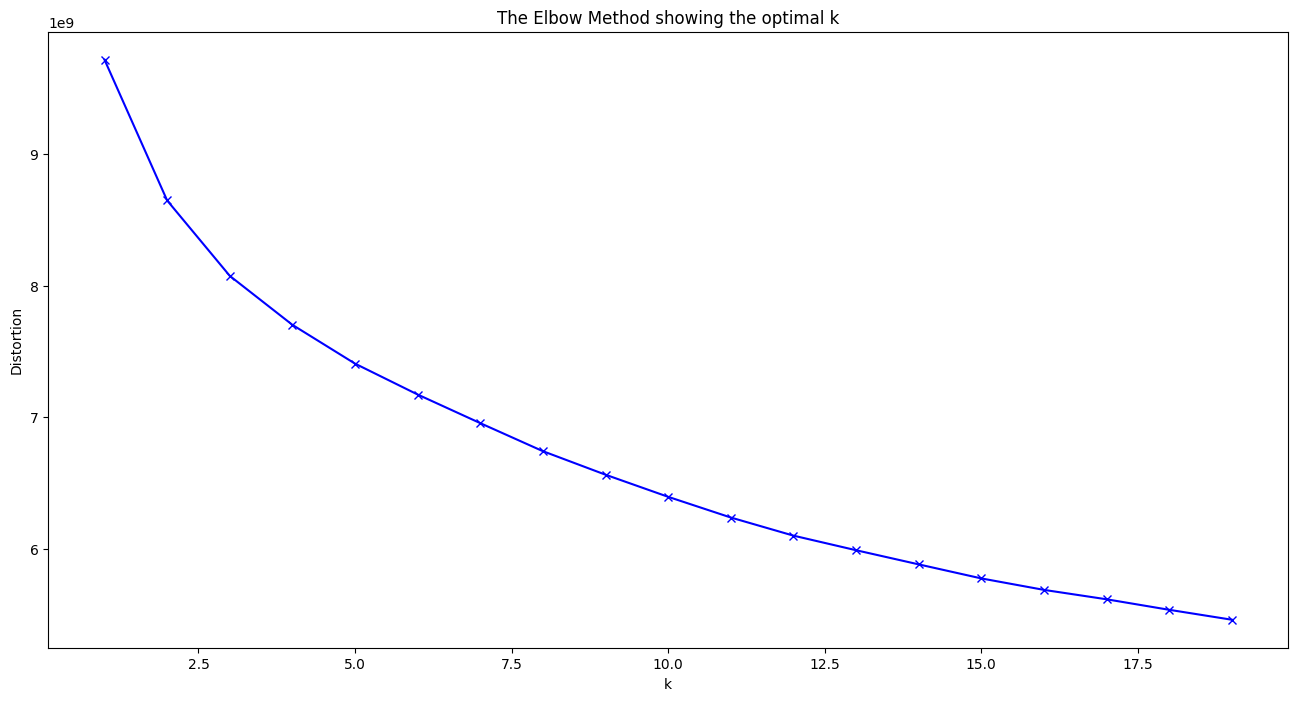

In [68]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(data_F)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# KMEANS  SIFT

In [69]:
kmeans_f = KMeans(n_clusters=15,n_init=10)  # no. of cluster = 15
kmeans_f.fit(data_F)

KMeans(n_clusters=15, n_init=10)

In [70]:
# save the model to disk
filename = 'Kmeans_FREAK_Model.sav'
pickle.dump(kmeans_f, open(filename, 'wb'))

In [71]:
import os

# Define the filename used for saving the model
filename = 'Kmeans_FREAK_Model.sav'

# Get the current working directory
current_directory = os.getcwd()

# Combine the current directory with the filename to get the full path
full_path = os.path.join(current_directory, filename)

# Print the full path to the saved model
print("Model saved at:", full_path)

Model saved at: C:\Users\prati\Kmeans_FREAK_Model.sav


In [72]:
hist=np.histogram(kmeans_f.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 3891,  4441,  3826,  4925,  4323,  1830,  3848, 11183,  4283,
        4617,  4340,  5089,  4743,  8223,  3701], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [73]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 0
data = []
c = 0

for filename in os.listdir(folder_a):
    # Path
    path = os.path.join(folder_a, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  16
keypoint length  1  :  25
keypoint length  2  :  23
keypoint length  3  :  7
keypoint length  4  :  35
keypoint length  5  :  24
keypoint length  6  :  17
keypoint length  7  :  13
keypoint length  8  :  15
keypoint length  9  :  36
keypoint length  10  :  32
keypoint length  11  :  33
keypoint length  12  :  27
keypoint length  13  :  19
keypoint length  14  :  14
keypoint length  15  :  20
keypoint length  16  :  4
keypoint length  17  :  14
keypoint length  18  :  16
keypoint length  19  :  19
keypoint length  20  :  23
keypoint length  21  :  20
keypoint length  22  :  19
keypoint length  23  :  23
keypoint length  24  :  15
keypoint length  25  :  20
keypoint length  26  :  25
keypoint length  27  :  21
keypoint length  28  :  26
keypoint length  29  :  15
keypoint length  30  :  23
keypoint length  31  :  20
keypoint length  32  :  20
keypoint length  33  :  12
keypoint length  34  :  15
keypoint length  35  :  16
keypoint length  36  :  17
keypoint leng

In [74]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 1
data = []
c = 0

for filename in os.listdir(folder_b):
    # Path
    path = os.path.join(folder_b, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  4
keypoint length  1  :  4
keypoint length  2  :  15
keypoint length  3  :  33
keypoint length  4  :  10
keypoint length  5  :  9
keypoint length  6  :  11
keypoint length  7  :  13
keypoint length  8  :  10
keypoint length  9  :  11
keypoint length  10  :  11
keypoint length  11  :  10
keypoint length  12  :  3
keypoint length  13  :  12
keypoint length  14  :  10
keypoint length  15  :  5
keypoint length  16  :  27
keypoint length  17  :  5
keypoint length  18  :  4
keypoint length  19  :  1
keypoint length  20  :  1
keypoint length  21  :  5
keypoint length  22  :  10
keypoint length  23  :  5
keypoint length  24  :  11
keypoint length  25  :  13
keypoint length  26  :  12
keypoint length  27  :  10
keypoint length  28  :  30
keypoint length  29  :  13
keypoint length  30  :  11
keypoint length  31  :  11
keypoint length  32  :  10
keypoint length  33  :  9
keypoint length  34  :  5
keypoint length  35  :  9
keypoint length  36  :  12
keypoint length  37  :  1

In [75]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 2
data = []
c = 0

for filename in os.listdir(folder_c):
    # Path
    path = os.path.join(folder_c, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/gm_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  31
keypoint length  1  :  31
keypoint length  2  :  25
keypoint length  3  :  26
keypoint length  4  :  31
keypoint length  5  :  38
keypoint length  6  :  39
keypoint length  7  :  35
keypoint length  8  :  35
keypoint length  9  :  35
keypoint length  10  :  40
keypoint length  11  :  30
keypoint length  12  :  37
keypoint length  13  :  33
keypoint length  14  :  30
keypoint length  15  :  31
keypoint length  16  :  26
keypoint length  17  :  34
keypoint length  18  :  30
keypoint length  19  :  35
keypoint length  20  :  42
keypoint length  21  :  31
keypoint length  22  :  40
keypoint length  23  :  30
keypoint length  24  :  36
keypoint length  25  :  35
keypoint length  26  :  25
keypoint length  27  :  21
keypoint length  28  :  27
keypoint length  29  :  19
keypoint length  30  :  20
keypoint length  31  :  17
keypoint length  32  :  17
keypoint length  33  :  17
keypoint length  34  :  31
keypoint length  35  :  17
keypoint length  36  :  20
keypoint le

In [76]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 3
data = []
c = 0

for filename in os.listdir(folder_d):
    # Path
    path = os.path.join(folder_d, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giloy_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  13
keypoint length  1  :  23
keypoint length  2  :  9
keypoint length  3  :  15
keypoint length  4  :  7
keypoint length  5  :  9
keypoint length  6  :  13
keypoint length  7  :  11
keypoint length  8  :  10
keypoint length  9  :  8
keypoint length  10  :  9
keypoint length  11  :  11
keypoint length  12  :  16
keypoint length  13  :  11
keypoint length  14  :  10
keypoint length  15  :  12
keypoint length  16  :  15
keypoint length  17  :  7
keypoint length  18  :  8
keypoint length  19  :  11
keypoint length  20  :  7
keypoint length  21  :  10
keypoint length  22  :  15
keypoint length  23  :  16
keypoint length  24  :  32
keypoint length  25  :  11
keypoint length  26  :  20
keypoint length  27  :  26
keypoint length  28  :  22
keypoint length  29  :  23
keypoint length  30  :  35
keypoint length  31  :  25
keypoint length  32  :  26
keypoint length  33  :  13
keypoint length  34  :  14
keypoint length  35  :  27
keypoint length  36  :  14
keypoint length  37

In [77]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 4
data = []
c = 0

for filename in os.listdir(folder_e):
    # Path
    path = os.path.join(folder_e, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  233
keypoint length  1  :  279
keypoint length  2  :  203
keypoint length  3  :  244
keypoint length  4  :  215
keypoint length  5  :  215
keypoint length  6  :  208
keypoint length  7  :  208
keypoint length  8  :  46
keypoint length  9  :  46
keypoint length  10  :  41
keypoint length  11  :  45
keypoint length  12  :  272
keypoint length  13  :  45
keypoint length  14  :  40
keypoint length  15  :  249
keypoint length  16  :  257
keypoint length  17  :  38
keypoint length  18  :  40
keypoint length  19  :  40
keypoint length  20  :  45
keypoint length  21  :  42
keypoint length  22  :  38
keypoint length  23  :  265
keypoint length  24  :  46
keypoint length  25  :  43
keypoint length  26  :  46
keypoint length  27  :  45
keypoint length  28  :  253
keypoint length  29  :  46
keypoint length  30  :  41
keypoint length  31  :  37
keypoint length  32  :  38
keypoint length  33  :  39
keypoint length  34  :  213
keypoint length  35  :  48
keypoint length  36  :  

In [78]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 5
data = []
c = 0

for filename in os.listdir(folder_f):
    # Path
    path = os.path.join(folder_f, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/guava_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  103
keypoint length  1  :  13
keypoint length  2  :  79
keypoint length  3  :  176
keypoint length  4  :  86
keypoint length  5  :  87
keypoint length  6  :  83
keypoint length  7  :  79
keypoint length  8  :  93
keypoint length  9  :  86
keypoint length  10  :  89
keypoint length  11  :  77
keypoint length  12  :  15
keypoint length  13  :  90
keypoint length  14  :  95
keypoint length  15  :  88
keypoint length  16  :  181
keypoint length  17  :  102
keypoint length  18  :  91
keypoint length  19  :  92
keypoint length  20  :  12
keypoint length  21  :  20
keypoint length  22  :  12
keypoint length  23  :  18
keypoint length  24  :  15
keypoint length  25  :  11
keypoint length  26  :  6
keypoint length  27  :  9
keypoint length  28  :  182
keypoint length  29  :  7
keypoint length  30  :  6
keypoint length  31  :  9
keypoint length  32  :  6
keypoint length  33  :  10
keypoint length  34  :  54
keypoint length  35  :  8
keypoint length  36  :  5
keypoint lengt

In [79]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 6
data = []
c = 0

for filename in os.listdir(folder_g):
    # Path
    path = os.path.join(folder_g, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulsi_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  12
keypoint length  1  :  43
keypoint length  2  :  39
keypoint length  3  :  36
keypoint length  4  :  34
keypoint length  5  :  35
keypoint length  6  :  34
keypoint length  7  :  37
keypoint length  8  :  39
keypoint length  9  :  36
keypoint length  10  :  40
keypoint length  11  :  36
keypoint length  12  :  50
keypoint length  13  :  41
keypoint length  14  :  38
keypoint length  15  :  14
keypoint length  16  :  29
keypoint length  17  :  36
keypoint length  18  :  36
keypoint length  19  :  32
keypoint length  20  :  30
keypoint length  21  :  37
keypoint length  22  :  34
keypoint length  23  :  45
keypoint length  24  :  34
keypoint length  25  :  34
keypoint length  26  :  35
keypoint length  27  :  36
keypoint length  28  :  31
keypoint length  29  :  31
keypoint length  30  :  60
keypoint length  31  :  69
keypoint length  32  :  65
keypoint length  33  :  72
keypoint length  34  :  57
keypoint length  35  :  64
keypoint length  36  :  58
keypoint le

In [80]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize i=0; as it's the first class
i = 7
data = []
c = 0

for filename in os.listdir(folder_h):
    # Path
    path = os.path.join(folder_h, filename)
    a = cv2.imread(path)

    # Resize image
    resize = (150, 150)
    img = cv2.resize(a, resize)
    
    # Gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.GaussianBlur(gray, (5, 5), 0)  # Gaussian Image
        
    # Creating a Histograms Equalization of an image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
        
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Kernels for Prewitt edge detection
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)  # Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)  # Vertical
    img_prewitt = img_prewittx + img_prewitty

    brisk = cv2.BRISK_create()
    keypoints, d = brisk.detectAndCompute(gray, None)
    
    # Check if keypoints are detected
    if keypoints is not None and len(keypoints) > 0:
        # Check if descriptors are computed
        if d is not None:
            # Initialise descriptor
            sift = cv2.xfeatures2d.SIFT_create()
            k, descriptors = sift.compute(gray, keypoints)
            out = pd.DataFrame(descriptors)
            
            # Check if descriptors are not empty
            if descriptors is not None and len(descriptors) > 0:
                # Predict values of feature vector with pre-trained kmeans
                array_double = np.array(out, dtype=np.double)
                a = kmeans_f.predict(array_double)
                
                hist = np.histogram(a, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
                
                # Append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
                data.append(hist[0] / len(keypoints))
                print("keypoint length ", c, " : ", len(keypoints))
                c += 1
                if c == 2000:
                    break
            else:
                print("Descriptors are empty in image:", filename)
        else:
            print("Descriptors are not computed in image:", filename)
    else:
        print("No keypoints detected in image:", filename)

# Convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
# Add row class 
Output["Class"] = i 
csv_data = Output.to_csv('C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/am_Prediction_F.csv', mode='a', header=False, index=False)


keypoint length  0  :  55
keypoint length  1  :  89
keypoint length  2  :  135
keypoint length  3  :  78
keypoint length  4  :  135
keypoint length  5  :  140
keypoint length  6  :  140
keypoint length  7  :  158
keypoint length  8  :  158
keypoint length  9  :  154
keypoint length  10  :  154
keypoint length  11  :  135
keypoint length  12  :  89
keypoint length  13  :  135
keypoint length  14  :  140
keypoint length  15  :  55
keypoint length  16  :  78
keypoint length  17  :  140
keypoint length  18  :  142
keypoint length  19  :  142
keypoint length  20  :  149
keypoint length  21  :  149
keypoint length  22  :  81
keypoint length  23  :  78
keypoint length  24  :  81
keypoint length  25  :  98
keypoint length  26  :  98
keypoint length  27  :  88
keypoint length  28  :  86
keypoint length  29  :  88
keypoint length  30  :  88
keypoint length  31  :  88
keypoint length  32  :  85
keypoint length  33  :  85
keypoint length  34  :  79
keypoint length  35  :  81
keypoint length  36  :

In [81]:
#Displaying the kmeans predicted data
print("Adulasa Images")
dat1_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/adulasa_prediction_F.csv",header=None)
print(dat1_f)

Adulasa Images
      0         1       2    3    4         5    6    7         8         9   \
0    0.0  0.250000  0.1875  0.0  0.0  0.125000  0.0  0.0  0.000000  0.062500   
1    0.0  0.160000  0.0000  0.0  0.0  0.520000  0.0  0.0  0.240000  0.000000   
2    0.0  0.086957  0.0000  0.0  0.0  0.173913  0.0  0.0  0.000000  0.000000   
3    0.0  0.285714  0.0000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.428571   
4    0.0  0.228571  0.0000  0.0  0.0  0.057143  0.0  0.0  0.000000  0.000000   
..   ...       ...     ...  ...  ...       ...  ...  ...       ...       ...   
214  0.0  0.086957  0.0000  0.0  0.0  0.086957  0.0  0.0  0.260870  0.000000   
215  0.0  0.050000  0.0000  0.0  0.0  0.050000  0.0  0.0  0.200000  0.000000   
216  0.0  0.095238  0.0000  0.0  0.0  0.095238  0.0  0.0  0.285714  0.000000   
217  0.0  0.200000  0.0000  0.0  0.0  0.100000  0.0  0.0  0.300000  0.000000   
218  0.0  0.176471  0.0000  0.0  0.0  0.176471  0.0  0.0  0.235294  0.000000   

           10        11 

In [82]:
print("Alovera Images")
dat2_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/alovera_prediction_F.csv",header=None)
print(dat2_f)

Alovera Images
      0         1         2    3         4         5    6    7         8   \
0    0.0  1.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.000000   
1    0.0  0.750000  0.250000  0.0  0.000000  0.000000  0.0  0.0  0.000000   
2    0.0  0.333333  0.133333  0.0  0.066667  0.066667  0.0  0.0  0.000000   
3    0.0  0.787879  0.060606  0.0  0.000000  0.000000  0.0  0.0  0.030303   
4    0.0  0.300000  0.100000  0.0  0.100000  0.100000  0.0  0.0  0.000000   
..   ...       ...       ...  ...       ...       ...  ...  ...       ...   
215  0.0  0.181818  0.090909  0.0  0.090909  0.090909  0.0  0.0  0.000000   
216  0.0  0.222222  0.222222  0.0  0.000000  0.111111  0.0  0.0  0.000000   
217  0.0  0.222222  0.222222  0.0  0.111111  0.111111  0.0  0.0  0.000000   
218  0.0  0.250000  0.250000  0.0  0.000000  0.083333  0.0  0.0  0.000000   
219  0.0  0.416667  0.166667  0.0  0.000000  0.083333  0.0  0.0  0.000000   

           9    10   11        12   13   14  15  
0    0.000

In [83]:
print("GM Images")
dat3_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/gm_prediction_F.csv",header=None)
print(dat3_f)

GM Images
      0         1         2    3    4         5    6    7         8   \
0    0.0  0.129032  0.161290  0.0  0.0  0.258065  0.0  0.0  0.064516   
1    0.0  0.064516  0.225806  0.0  0.0  0.290323  0.0  0.0  0.064516   
2    0.0  0.160000  0.000000  0.0  0.0  0.320000  0.0  0.0  0.040000   
3    0.0  0.153846  0.307692  0.0  0.0  0.038462  0.0  0.0  0.038462   
4    0.0  0.129032  0.064516  0.0  0.0  0.258065  0.0  0.0  0.000000   
..   ...       ...       ...  ...  ...       ...  ...  ...       ...   
214  0.0  0.103448  0.000000  0.0  0.0  0.344828  0.0  0.0  0.034483   
215  0.0  0.134615  0.166667  0.0  0.0  0.012821  0.0  0.0  0.211538   
216  0.0  0.133333  0.100000  0.0  0.0  0.266667  0.0  0.0  0.000000   
217  0.0  0.187500  0.031250  0.0  0.0  0.218750  0.0  0.0  0.031250   
218  0.0  0.066667  0.066667  0.0  0.0  0.266667  0.0  0.0  0.033333   

           9    10        11        12   13   14  15  
0    0.290323  0.0  0.000000  0.096774  0.0  0.0   2  
1    0.258065  

In [84]:
print("Giloy Images")
dat4_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/giloy_prediction_F.csv",header=None)
print(dat4_f)

Giloy Images
      0         1         2    3    4         5    6    7         8   \
0    0.0  0.153846  0.000000  0.0  0.0  0.307692  0.0  0.0  0.076923   
1    0.0  0.304348  0.043478  0.0  0.0  0.347826  0.0  0.0  0.043478   
2    0.0  0.111111  0.000000  0.0  0.0  0.111111  0.0  0.0  0.111111   
3    0.0  0.133333  0.000000  0.0  0.0  0.200000  0.0  0.0  0.133333   
4    0.0  0.142857  0.000000  0.0  0.0  0.285714  0.0  0.0  0.000000   
..   ...       ...       ...  ...  ...       ...  ...  ...       ...   
215  0.0  0.000000  0.000000  0.0  0.0  0.250000  0.0  0.0  0.083333   
216  0.0  0.000000  0.000000  0.0  0.0  0.416667  0.0  0.0  0.166667   
217  0.0  0.000000  0.000000  0.0  0.0  0.428571  0.0  0.0  0.000000   
218  0.0  0.000000  0.000000  0.0  0.0  0.461538  0.0  0.0  0.076923   
219  0.0  0.000000  0.000000  0.0  0.0  0.333333  0.0  0.0  0.166667   

           9         10        11        12   13   14  15  
0    0.000000  0.000000  0.000000  0.461538  0.0  0.0   3  
1 

In [85]:
print("Neem Images")
dat5_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/neem_prediction_F.csv",header=None)
print(dat5_f)

Neem Images
      0         1         2    3         4         5         6    7   \
0    0.0  0.193133  0.034335  0.0  0.030043  0.163090  0.008584  0.0   
1    0.0  0.132616  0.025090  0.0  0.003584  0.161290  0.003584  0.0   
2    0.0  0.137931  0.083744  0.0  0.014778  0.128079  0.004926  0.0   
3    0.0  0.209016  0.045082  0.0  0.012295  0.217213  0.020492  0.0   
4    0.0  0.125581  0.093023  0.0  0.004651  0.120930  0.013953  0.0   
..   ...       ...       ...  ...       ...       ...       ...  ...   
215  0.0  0.119617  0.086124  0.0  0.009569  0.148325  0.009569  0.0   
216  0.0  0.119617  0.086124  0.0  0.009569  0.148325  0.009569  0.0   
217  0.0  0.106977  0.074419  0.0  0.018605  0.144186  0.009302  0.0   
218  0.0  0.106977  0.074419  0.0  0.018605  0.144186  0.009302  0.0   
219  0.0  0.137931  0.083744  0.0  0.014778  0.128079  0.004926  0.0   

           8         9         10        11        12   13   14  15  
0    0.227468  0.128755  0.017167  0.193133  0.004292

In [86]:
print("Guava Images")
dat6_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/guava_prediction_F.csv",header=None)
print(dat6_f)

Guava Images
      0         1         2    3         4         5         6    7   \
0    0.0  0.106796  0.019417  0.0  0.000000  0.184466  0.000000  0.0   
1    0.0  0.230769  0.000000  0.0  0.000000  0.307692  0.000000  0.0   
2    0.0  0.518987  0.113924  0.0  0.000000  0.151899  0.000000  0.0   
3    0.0  0.323864  0.034091  0.0  0.011364  0.113636  0.011364  0.0   
4    0.0  0.453488  0.151163  0.0  0.000000  0.116279  0.000000  0.0   
..   ...       ...       ...  ...       ...       ...       ...  ...   
215  0.0  0.415254  0.152542  0.0  0.000000  0.139831  0.000000  0.0   
216  0.0  0.537037  0.055556  0.0  0.000000  0.129630  0.000000  0.0   
217  0.0  0.588235  0.047059  0.0  0.000000  0.129412  0.011765  0.0   
218  0.0  0.565789  0.078947  0.0  0.000000  0.144737  0.000000  0.0   
219  0.0  0.539474  0.105263  0.0  0.000000  0.144737  0.000000  0.0   

           8         9         10        11        12   13   14  15  
0    0.310680  0.067961  0.000000  0.223301  0.08737

In [87]:
print("Tulasi Images")
dat7_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/tulsi_prediction_F.csv",header=None)
print(dat7_f)

Tulasi Images
      0         1    2    3    4         5    6    7         8    9    10  \
0    0.0  0.000000  0.0  0.0  0.0  0.916667  0.0  0.0  0.083333  0.0  0.0   
1    0.0  0.232558  0.0  0.0  0.0  0.395349  0.0  0.0  0.093023  0.0  0.0   
2    0.0  0.128205  0.0  0.0  0.0  0.487179  0.0  0.0  0.128205  0.0  0.0   
3    0.0  0.388889  0.0  0.0  0.0  0.250000  0.0  0.0  0.138889  0.0  0.0   
4    0.0  0.176471  0.0  0.0  0.0  0.382353  0.0  0.0  0.147059  0.0  0.0   
..   ...       ...  ...  ...  ...       ...  ...  ...       ...  ...  ...   
215  0.0  0.176471  0.0  0.0  0.0  0.500000  0.0  0.0  0.117647  0.0  0.0   
216  0.0  0.111111  0.0  0.0  0.0  0.527778  0.0  0.0  0.083333  0.0  0.0   
217  0.0  0.189189  0.0  0.0  0.0  0.513514  0.0  0.0  0.081081  0.0  0.0   
218  0.0  0.131579  0.0  0.0  0.0  0.578947  0.0  0.0  0.052632  0.0  0.0   
219  0.0  0.147059  0.0  0.0  0.0  0.470588  0.0  0.0  0.088235  0.0  0.0   

           11        12   13   14  15  
0    0.000000  0.0000

In [88]:
print("AM Images")
dat8_f = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/am_prediction_F.csv",header=None)
print(dat8_f)

AM Images
      0         1         2    3    4         5    6    7         8   \
0    0.0  0.072727  0.000000  0.0  0.0  0.672727  0.0  0.0  0.109091   
1    0.0  0.202247  0.011236  0.0  0.0  0.651685  0.0  0.0  0.123596   
2    0.0  0.355556  0.022222  0.0  0.0  0.474074  0.0  0.0  0.081481   
3    0.0  0.307692  0.012821  0.0  0.0  0.512821  0.0  0.0  0.115385   
4    0.0  0.355556  0.022222  0.0  0.0  0.474074  0.0  0.0  0.081481   
..   ...       ...       ...  ...  ...       ...  ...  ...       ...   
215  0.0  0.309677  0.019355  0.0  0.0  0.522581  0.0  0.0  0.096774   
216  0.0  0.266234  0.032468  0.0  0.0  0.532468  0.0  0.0  0.103896   
217  0.0  0.266234  0.032468  0.0  0.0  0.532468  0.0  0.0  0.103896   
218  0.0  0.339744  0.019231  0.0  0.0  0.455128  0.0  0.0  0.102564   
219  0.0  0.339744  0.019231  0.0  0.0  0.455128  0.0  0.0  0.102564   

           9    10        11        12   13   14  15  
0    0.000000  0.0  0.145455  0.000000  0.0  0.0   7  
1    0.011236  

In [89]:
B=pd.concat([dat1_f, dat2_f, dat3_f, dat4_f, dat5_f, dat6_f, dat7_f, dat8_f])
csv_data_f=B.to_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalFREAK.csv", mode='a',header=False,index=False)

In [90]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.250000,0.187500,0.0,0.0,0.125000,0.0,0.0,0.000000,0.062500,0.0,0.062500,0.312500,0.0,0.0,0
1,0.0,0.160000,0.000000,0.0,0.0,0.520000,0.0,0.0,0.240000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0
2,0.0,0.086957,0.000000,0.0,0.0,0.173913,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.739130,0.0,0.0,0
3,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.428571,0.0,0.000000,0.285714,0.0,0.0,0
4,0.0,0.228571,0.000000,0.0,0.0,0.057143,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.657143,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.0,0.309677,0.019355,0.0,0.0,0.522581,0.0,0.0,0.096774,0.019355,0.0,0.025806,0.006452,0.0,0.0,7
216,0.0,0.266234,0.032468,0.0,0.0,0.532468,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7
217,0.0,0.266234,0.032468,0.0,0.0,0.532468,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7
218,0.0,0.339744,0.019231,0.0,0.0,0.455128,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7


# COMBINE BRISK + SIFT

In [91]:
import pandas as pd

# Read CSV files
pd1 = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalBRISK.csv", header=None)
pd2 = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalFREAK.csv", header=None)

# Create DataFrames
df1 = pd.DataFrame(pd1.iloc[:, :-1])  # Remove the second last column
df2 = pd.DataFrame(pd2)  # No need to remove any columns from df2


print("Number of rows in df1:", len(df1))
print("Number of rows in df2:", len(df2))


Number of rows in df1: 1760
Number of rows in df2: 1758


In [92]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.142857,0.000000,0.000000,0.428571,0.047619,0.000000,0.047619,0.190476,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.095238
1,0.057143,0.085714,0.085714,0.000000,0.000000,0.200000,0.000000,0.114286,0.000000,0.000000,0.057143,0.285714,0.028571,0.057143,0.000000,0.028571
2,0.027027,0.027027,0.000000,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.000000,0.027027,0.459459,0.000000,0.027027,0.000000,0.270270
3,0.056075,0.046729,0.028037,0.093458,0.102804,0.018692,0.065421,0.140187,0.000000,0.093458,0.037383,0.046729,0.056075,0.093458,0.056075,0.065421
4,0.021739,0.043478,0.065217,0.239130,0.021739,0.043478,0.043478,0.043478,0.086957,0.000000,0.043478,0.130435,0.021739,0.086957,0.021739,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.000000,0.040000,0.080000,0.060000,0.040000,0.040000,0.040000,0.000000,0.080000,0.020000,0.160000,0.180000,0.200000,0.000000,0.020000,0.040000
1756,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,0.092593,0.240741,0.148148,0.055556,0.000000,0.055556
1757,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,0.092593,0.240741,0.148148,0.055556,0.000000,0.055556
1758,0.000000,0.070175,0.087719,0.017544,0.087719,0.035088,0.035088,0.000000,0.175439,0.035088,0.070175,0.192982,0.157895,0.000000,0.000000,0.035088


In [93]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.250000,0.187500,0.0,0.0,0.125000,0.0,0.0,0.000000,0.062500,0.0,0.062500,0.312500,0.0,0.0,0
1,0.0,0.160000,0.000000,0.0,0.0,0.520000,0.0,0.0,0.240000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0
2,0.0,0.086957,0.000000,0.0,0.0,0.173913,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.739130,0.0,0.0,0
3,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.428571,0.0,0.000000,0.285714,0.0,0.0,0
4,0.0,0.228571,0.000000,0.0,0.0,0.057143,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.657143,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0.0,0.309677,0.019355,0.0,0.0,0.522581,0.0,0.0,0.096774,0.019355,0.0,0.025806,0.006452,0.0,0.0,7
1754,0.0,0.266234,0.032468,0.0,0.0,0.532468,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7
1755,0.0,0.266234,0.032468,0.0,0.0,0.532468,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7
1756,0.0,0.339744,0.019231,0.0,0.0,0.455128,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7


In [94]:
import pandas as pd

# Assuming df1 and df2 are defined earlier
fpd = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)

# Save to CSV without header and index
csv_data = fpd.to_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Final_Pretrained_BriskFreak.csv", mode='w', header=False, index=False)


In [95]:
final_data = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Final_Pretrained_BriskFreak.csv",header=None)

In [96]:
final_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.142857,0.000000,0.000000,0.428571,0.047619,0.000000,0.047619,0.190476,0.000000,0.000000,...,0.0,0.0,0.000000,0.062500,0.0,0.062500,0.312500,0.0,0.0,0.0
1,0.057143,0.085714,0.085714,0.000000,0.000000,0.200000,0.000000,0.114286,0.000000,0.000000,...,0.0,0.0,0.240000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0.0
2,0.027027,0.027027,0.000000,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.739130,0.0,0.0,0.0
3,0.056075,0.046729,0.028037,0.093458,0.102804,0.018692,0.065421,0.140187,0.000000,0.093458,...,0.0,0.0,0.000000,0.428571,0.0,0.000000,0.285714,0.0,0.0,0.0
4,0.021739,0.043478,0.065217,0.239130,0.021739,0.043478,0.043478,0.043478,0.086957,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.657143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.000000,0.040000,0.080000,0.060000,0.040000,0.040000,0.040000,0.000000,0.080000,0.020000,...,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7.0
1756,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1757,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1758,0.000000,0.070175,0.087719,0.017544,0.087719,0.035088,0.035088,0.000000,0.175439,0.035088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
final_data_k=pd.DataFrame(final_data)

In [98]:
final_data_k

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.142857,0.000000,0.000000,0.428571,0.047619,0.000000,0.047619,0.190476,0.000000,0.000000,...,0.0,0.0,0.000000,0.062500,0.0,0.062500,0.312500,0.0,0.0,0.0
1,0.057143,0.085714,0.085714,0.000000,0.000000,0.200000,0.000000,0.114286,0.000000,0.000000,...,0.0,0.0,0.240000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0.0
2,0.027027,0.027027,0.000000,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.739130,0.0,0.0,0.0
3,0.056075,0.046729,0.028037,0.093458,0.102804,0.018692,0.065421,0.140187,0.000000,0.093458,...,0.0,0.0,0.000000,0.428571,0.0,0.000000,0.285714,0.0,0.0,0.0
4,0.021739,0.043478,0.065217,0.239130,0.021739,0.043478,0.043478,0.043478,0.086957,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.657143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.000000,0.040000,0.080000,0.060000,0.040000,0.040000,0.040000,0.000000,0.080000,0.020000,...,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7.0
1756,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1757,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1758,0.000000,0.070175,0.087719,0.017544,0.087719,0.035088,0.035088,0.000000,0.175439,0.035088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
f_data= pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/Final_Pretrained_BriskFreak.csv",header=None)
f_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.142857,0.000000,0.000000,0.428571,0.047619,0.000000,0.047619,0.190476,0.000000,0.000000,...,0.0,0.0,0.000000,0.062500,0.0,0.062500,0.312500,0.0,0.0,0.0
1,0.057143,0.085714,0.085714,0.000000,0.000000,0.200000,0.000000,0.114286,0.000000,0.000000,...,0.0,0.0,0.240000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0.0
2,0.027027,0.027027,0.000000,0.081081,0.000000,0.027027,0.000000,0.000000,0.054054,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.739130,0.0,0.0,0.0
3,0.056075,0.046729,0.028037,0.093458,0.102804,0.018692,0.065421,0.140187,0.000000,0.093458,...,0.0,0.0,0.000000,0.428571,0.0,0.000000,0.285714,0.0,0.0,0.0
4,0.021739,0.043478,0.065217,0.239130,0.021739,0.043478,0.043478,0.043478,0.086957,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.657143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.000000,0.040000,0.080000,0.060000,0.040000,0.040000,0.040000,0.000000,0.080000,0.020000,...,0.0,0.0,0.103896,0.045455,0.0,0.012987,0.006494,0.0,0.0,7.0
1756,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1757,0.000000,0.018519,0.037037,0.018519,0.055556,0.037037,0.037037,0.000000,0.166667,0.037037,...,0.0,0.0,0.102564,0.038462,0.0,0.044872,0.000000,0.0,0.0,7.0
1758,0.000000,0.070175,0.087719,0.017544,0.087719,0.035088,0.035088,0.000000,0.175439,0.035088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:


f_data.fillna(0, inplace=True)
f_data.dtypes


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [101]:
x = f_data.iloc[:,0:32].values

In [102]:
x

array([[0.14285714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05714286, 0.08571429, 0.08571429, ..., 0.        , 0.        ,
        0.        ],
       [0.02702703, 0.02702703, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01851852, 0.03703704, ..., 0.        , 0.        ,
        7.        ],
       [0.        , 0.07017544, 0.0877193 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07017544, 0.0877193 , ..., 0.        , 0.        ,
        0.        ]])

In [103]:
y = f_data.iloc[:,31].values

In [104]:
y

array([0., 0., 0., ..., 7., 0., 0.])

# Using PCA for Dimensionality Reduction

In [105]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [106]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [109]:
Bhumi = pca.transform(Dhoni)

In [110]:
Bhumi

array([[ 1.05302371e+00, -2.76609290e+00,  3.55167149e+00, ...,
         3.25685651e-02,  2.94229571e-16, -6.81740218e-16],
       [-2.54548156e+00,  2.12128324e+00,  8.10999784e-01, ...,
        -1.41699854e-02,  5.65838066e-17, -2.29596733e-18],
       [-2.74096331e+00, -3.24169903e+00,  1.16669532e+00, ...,
        -1.65439039e-02, -2.49080390e-15,  4.19716884e-16],
       ...,
       [-2.21385308e+00, -2.16046071e-01, -2.79066496e+00, ...,
        -4.25183016e-02,  1.02319522e-15,  1.02750539e-18],
       [-9.03213470e-01, -1.13823485e+00, -1.01154858e+00, ...,
         2.40819677e+00,  3.43443623e-16, -1.38832562e-16],
       [-9.03213470e-01, -1.13823485e+00, -1.01154858e+00, ...,
         2.40819677e+00,  3.43443623e-16, -1.38832562e-16]])

In [111]:
Bhumi.shape

(1760, 32)

In [112]:
Bhumi = pd.DataFrame(Bhumi)

In [113]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.053024,-2.766093,3.551671,0.882285,-3.617895,-1.107698,0.313194,0.247924,3.238532,-1.177328,...,0.776304,1.352066,1.431624,1.137373,1.594842,-0.534963,-0.154448,0.032569,2.942296e-16,-6.817402e-16
1,-2.545482,2.121283,0.811000,2.759518,-0.684668,-1.022942,-0.183317,-1.019893,0.286061,0.443145,...,-0.816329,-0.914083,-0.237729,-0.062093,-0.265338,0.030717,1.480600,-0.014170,5.658381e-17,-2.295967e-18
2,-2.740963,-3.241699,1.166695,0.027789,-2.101967,-0.076357,-1.929084,0.504089,1.397692,0.137051,...,0.421538,-0.665213,1.109848,0.195274,-1.558810,1.393203,0.742372,-0.016544,-2.490804e-15,4.197169e-16
3,2.954174,-1.287163,0.635371,-0.266772,-1.126195,-0.393970,-0.318785,-0.412712,0.539234,0.115559,...,0.368976,-0.321448,0.196415,-2.449996,-0.536753,-0.160959,0.453642,-0.002602,1.977109e-15,5.678369e-16
4,-1.546417,-2.194748,2.806845,-1.204750,-1.662841,0.056404,-0.190199,0.265840,0.969551,0.124341,...,0.870131,1.070140,0.722224,0.382009,-0.036118,-0.860245,0.056544,-0.012629,-3.211728e-16,4.163769e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,-2.098280,0.591634,-3.672773,0.849074,0.611467,0.330150,-0.224867,0.450270,-0.862395,0.375465,...,0.454575,1.120597,-0.386574,0.807404,-0.598803,-1.146724,-0.001451,-0.047981,-1.908061e-15,1.539903e-16
1756,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,-0.217785,-0.042518,1.023195e-15,1.027505e-18
1757,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,-0.217785,-0.042518,1.023195e-15,1.027505e-18
1758,-0.903213,-1.138235,-1.011549,0.366873,0.992222,0.452947,-0.171341,0.382403,-1.219315,0.664780,...,-0.171247,0.108932,0.155364,0.376406,-0.376518,-0.884022,1.397622,2.408197,3.434436e-16,-1.388326e-16


In [114]:
print(pca.explained_variance_ratio_.sum())

1.0000000000000002


In [115]:
pca = PCA(n_components=28)
pca.fit(Dhoni)

PCA(n_components=28)

In [116]:
# save the model to disk
filename = r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/PCA_Model.sav"
pickle.dump(pca, open(filename, 'wb'))

In [117]:
Bhumi = pca.transform(Dhoni)
Bhumi

array([[ 1.05302371, -2.7660929 ,  3.55167149, ...,  1.13737274,
         1.59484216, -0.53496343],
       [-2.54548156,  2.12128324,  0.81099978, ..., -0.06209316,
        -0.26533826,  0.03071743],
       [-2.74096331, -3.24169903,  1.16669532, ...,  0.1952739 ,
        -1.5588101 ,  1.39320251],
       ...,
       [-2.21385308, -0.21604607, -2.79066496, ...,  0.28124311,
         0.03063202, -0.26532571],
       [-0.90321347, -1.13823485, -1.01154858, ...,  0.37640598,
        -0.37651791, -0.88402191],
       [-0.90321347, -1.13823485, -1.01154858, ...,  0.37640598,
        -0.37651791, -0.88402191]])

In [118]:
Bhumi.shape

(1760, 28)

In [119]:
print(pca.explained_variance_ratio_.sum()) 

0.9903576688694326


In [120]:
Bhumi = pd.DataFrame(Bhumi)
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.053024,-2.766093,3.551671,0.882285,-3.617895,-1.107698,0.313194,0.247924,3.238532,-1.177328,...,0.263762,0.339380,0.345625,-0.451840,0.776304,1.352066,1.431624,1.137373,1.594842,-0.534963
1,-2.545482,2.121283,0.811000,2.759518,-0.684668,-1.022942,-0.183317,-1.019893,0.286061,0.443145,...,1.106255,-0.450805,1.297901,-0.665941,-0.816329,-0.914083,-0.237729,-0.062093,-0.265338,0.030717
2,-2.740963,-3.241699,1.166695,0.027789,-2.101967,-0.076357,-1.929084,0.504089,1.397692,0.137051,...,-0.979829,-0.243307,-0.778316,1.079195,0.421538,-0.665213,1.109848,0.195274,-1.558810,1.393203
3,2.954174,-1.287163,0.635371,-0.266772,-1.126195,-0.393970,-0.318785,-0.412712,0.539234,0.115559,...,0.661057,-0.152946,1.183395,0.502088,0.368976,-0.321448,0.196415,-2.449996,-0.536753,-0.160959
4,-1.546417,-2.194748,2.806845,-1.204750,-1.662841,0.056404,-0.190199,0.265840,0.969551,0.124341,...,-0.533425,0.262108,0.214091,-0.227630,0.870131,1.070140,0.722224,0.382009,-0.036118,-0.860245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,-2.098280,0.591634,-3.672773,0.849074,0.611467,0.330150,-0.224867,0.450270,-0.862395,0.375465,...,-0.568129,0.745428,0.744731,0.304521,0.454575,1.120597,-0.386574,0.807404,-0.598803,-1.146724
1756,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,-0.864865,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326
1757,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,-0.864865,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326
1758,-0.903213,-1.138235,-1.011549,0.366873,0.992222,0.452947,-0.171341,0.382403,-1.219315,0.664780,...,-2.327537,1.354306,1.381938,0.962507,-0.171247,0.108932,0.155364,0.376406,-0.376518,-0.884022


In [121]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,0
0,1.053024,-2.766093,3.551671,0.882285,-3.617895,-1.107698,0.313194,0.247924,3.238532,-1.177328,...,0.339380,0.345625,-0.451840,0.776304,1.352066,1.431624,1.137373,1.594842,-0.534963,0.0
1,-2.545482,2.121283,0.811000,2.759518,-0.684668,-1.022942,-0.183317,-1.019893,0.286061,0.443145,...,-0.450805,1.297901,-0.665941,-0.816329,-0.914083,-0.237729,-0.062093,-0.265338,0.030717,0.0
2,-2.740963,-3.241699,1.166695,0.027789,-2.101967,-0.076357,-1.929084,0.504089,1.397692,0.137051,...,-0.243307,-0.778316,1.079195,0.421538,-0.665213,1.109848,0.195274,-1.558810,1.393203,0.0
3,2.954174,-1.287163,0.635371,-0.266772,-1.126195,-0.393970,-0.318785,-0.412712,0.539234,0.115559,...,-0.152946,1.183395,0.502088,0.368976,-0.321448,0.196415,-2.449996,-0.536753,-0.160959,0.0
4,-1.546417,-2.194748,2.806845,-1.204750,-1.662841,0.056404,-0.190199,0.265840,0.969551,0.124341,...,0.262108,0.214091,-0.227630,0.870131,1.070140,0.722224,0.382009,-0.036118,-0.860245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,-2.098280,0.591634,-3.672773,0.849074,0.611467,0.330150,-0.224867,0.450270,-0.862395,0.375465,...,0.745428,0.744731,0.304521,0.454575,1.120597,-0.386574,0.807404,-0.598803,-1.146724,7.0
1756,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,7.0
1757,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,7.0
1758,-0.903213,-1.138235,-1.011549,0.366873,0.992222,0.452947,-0.171341,0.382403,-1.219315,0.664780,...,1.354306,1.381938,0.962507,-0.171247,0.108932,0.155364,0.376406,-0.376518,-0.884022,0.0


In [122]:
csv_data=B.to_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalPCAFV.csv", mode='a',header=False,index=False)

# Training, Testing and Classification

In [123]:
train_data = pd.read_csv(r"C:/Users/prati/OneDrive/Desktop/Medical_project/csv_files/FinalPCAFV.csv",header=None)

In [124]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.053024,-2.766093,3.551671,0.882285,-3.617895,-1.107698,0.313194,0.247924,3.238532,-1.177328,...,0.339380,0.345625,-0.451840,0.776304,1.352066,1.431624,1.137373,1.594842,-0.534963,0.0
1,-2.545482,2.121283,0.811000,2.759518,-0.684668,-1.022942,-0.183317,-1.019893,0.286061,0.443145,...,-0.450805,1.297901,-0.665941,-0.816329,-0.914083,-0.237729,-0.062093,-0.265338,0.030717,0.0
2,-2.740963,-3.241699,1.166695,0.027789,-2.101967,-0.076357,-1.929084,0.504089,1.397692,0.137051,...,-0.243307,-0.778316,1.079195,0.421538,-0.665213,1.109848,0.195274,-1.558810,1.393203,0.0
3,2.954174,-1.287163,0.635371,-0.266772,-1.126195,-0.393970,-0.318785,-0.412712,0.539234,0.115559,...,-0.152946,1.183395,0.502088,0.368976,-0.321448,0.196415,-2.449996,-0.536753,-0.160959,0.0
4,-1.546417,-2.194748,2.806845,-1.204750,-1.662841,0.056404,-0.190199,0.265840,0.969551,0.124341,...,0.262108,0.214091,-0.227630,0.870131,1.070140,0.722224,0.382009,-0.036118,-0.860245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,-2.098280,0.591634,-3.672773,0.849074,0.611467,0.330150,-0.224867,0.450270,-0.862395,0.375465,...,0.745428,0.744731,0.304521,0.454575,1.120597,-0.386574,0.807404,-0.598803,-1.146724,7.0
1756,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,7.0
1757,-2.213853,-0.216046,-2.790665,-0.080515,1.498804,0.524557,0.100396,-0.372638,-0.977159,0.249263,...,0.341111,0.198521,1.160986,0.307416,0.451902,0.281102,0.281243,0.030632,-0.265326,7.0
1758,-0.903213,-1.138235,-1.011549,0.366873,0.992222,0.452947,-0.171341,0.382403,-1.219315,0.664780,...,1.354306,1.381938,0.962507,-0.171247,0.108932,0.155364,0.376406,-0.376518,-0.884022,0.0


In [125]:
#assigning x the columns from 1 to 27 for training
x = train_data.iloc[:,0:28].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,28]
print("Y values")
print(y)

X values
[[ 1.05302371 -2.7660929   3.55167149 ...  1.13737274  1.59484216
  -0.53496343]
 [-2.54548156  2.12128324  0.81099978 ... -0.06209316 -0.26533826
   0.03071743]
 [-2.74096331 -3.24169903  1.16669532 ...  0.1952739  -1.5588101
   1.39320251]
 ...
 [-2.21385308 -0.21604607 -2.79066496 ...  0.28124311  0.03063202
  -0.26532571]
 [-0.90321347 -1.13823485 -1.01154858 ...  0.37640598 -0.37651791
  -0.88402191]
 [-0.90321347 -1.13823485 -1.01154858 ...  0.37640598 -0.37651791
  -0.88402191]]
Y values
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1755    7.0
1756    7.0
1757    7.0
1758    0.0
1759    0.0
Name: 28, Length: 1760, dtype: float64


In [126]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [127]:
import joblib

In [128]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, x_train, x_test, y_train, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'adulasa', 
                                        1: 'alovera',
                                        2: 'gm',
                                        3: 'giloy',
                                        4: 'neem',
                                        5: 'guava',
                                        6: 'nirgudi',+
                                        7: 'tulsi',
                                        8: 'am',
                                       })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

# DECISION TREE

In [129]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Results
Decision Tree Accuracy:  72.1590909090909 %
Train Accuracy: 0.9865056818181818
Test Accuracy: 0.7215909090909091
Precision Score:  0.7215909090909091
Recall Score:  0.7215909090909091
F2 Score:  0.7215909090909091
F1 Score:  0.7215909090909091
Confusion Matrix: 
[[27  0  8  1  2  5  2  0]
 [ 2 37  1  1  0  2  0  0]
 [ 3  6 31  2  0  4  3  0]
 [ 3  0  2 26  1  1  1  1]
 [ 0  1  0  2 44  4  1  1]
 [ 2  6  2  9  1 24  4  1]
 [ 0  0  0  4  2  2 27  3]
 [ 0  0  0  0  1  1  0 38]]


C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_clas

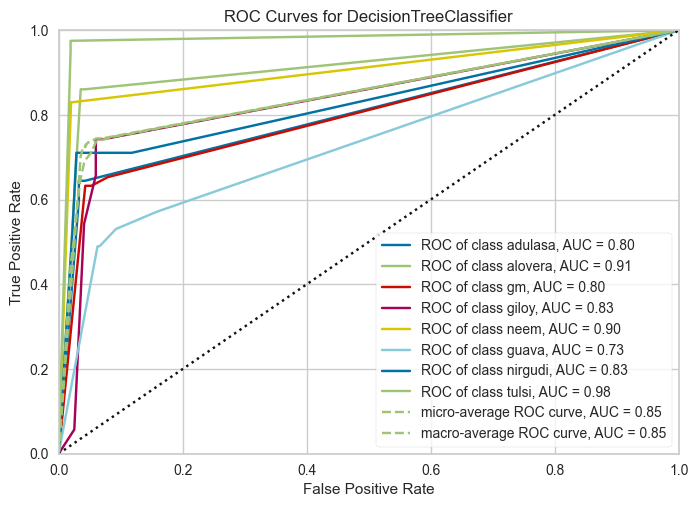

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'adulasa', 1: 'alovera', 2: 'gm', 3: 'giloy', 4: 'neem',
                5: 'guava', 6: 'nirgudi', 7: 'tulsi', 8: 'am'},
       estimator=DecisionTreeClassifier(max_depth=13))


In [130]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(x_train, y_train)
#joblib.dump(model_dt,"model_dt")
#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print(plot_ROC_curve(model_dt,x_train, x_test, y_train, y_test))

# RANDOM FOREST

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8693181818181818
Precision Score:  0.8693181818181818
Recall Score:  0.8693181818181818
F1 Score:  0.8693181818181818
Confusion Matrix: 
[[38  1  2  4  0  0  0  0]
 [ 1 41  0  0  0  1  0  0]
 [ 1  2 39  2  0  1  4  0]
 [ 2  0  0 32  0  0  1  0]
 [ 3  0  0  1 48  0  1  0]
 [ 1  0  4  3  0 34  7  0]
 [ 0  0  0  1  0  2 34  1]
 [ 0  0  0  0  0  0  0 40]]


C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


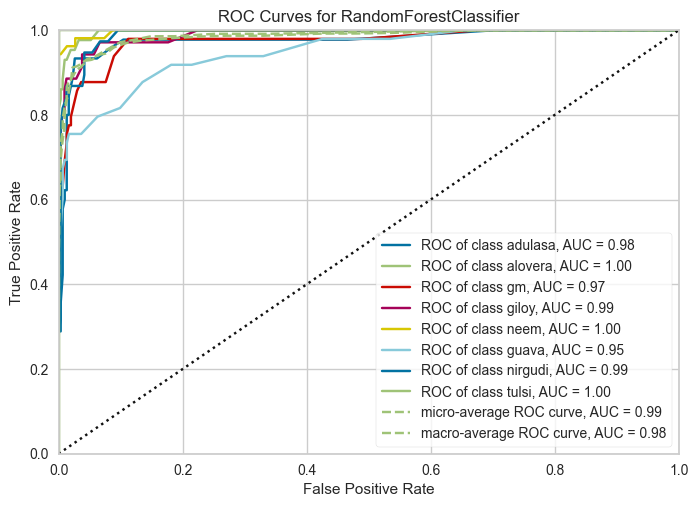

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'adulasa', 1: 'alovera', 2: 'gm', 3: 'giloy', 4: 'neem',
                5: 'guava', 6: 'nirgudi', 7: 'tulsi', 8: 'am'},
       estimator=RandomForestClassifier(n_estimators=50))


In [131]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print(plot_ROC_curve(model_rf,x_train, x_test, y_train, y_test))

# KNN

KNN
Train Accuracy: 0.9268465909090909
Test Accuracy: 0.8806818181818182
Precision Score:  0.8806818181818182
Recall Score:  0.8806818181818182
F1 Score:  0.8806818181818182


C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


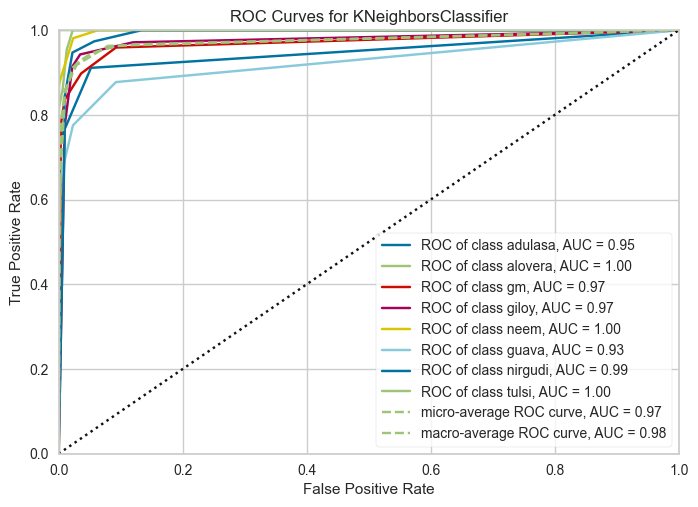

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'adulasa', 1: 'alovera', 2: 'gm', 3: 'giloy', 4: 'neem',
                5: 'guava', 6: 'nirgudi', 7: 'tulsi', 8: 'am'},
       estimator=KNeighborsClassifier())


In [132]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_knn,x_train, x_test, y_train, y_test))

# GAUSSIAN NAIVE BAYES


Gaussian NB
Train Accuracy: 0.8274147727272727
Test Accuracy: 0.7443181818181818
Precision Score:  0.7443181818181818
Recall Score:  0.7443181818181818
F1 Score:  0.7443181818181818


C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


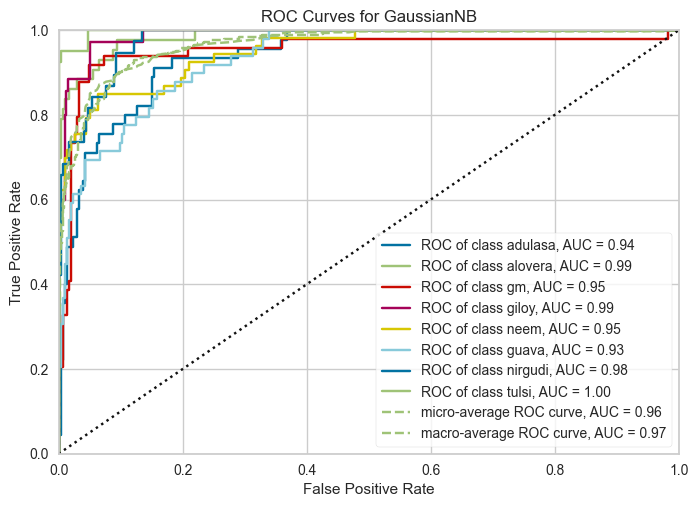

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'adulasa', 1: 'alovera', 2: 'gm', 3: 'giloy', 4: 'neem',
                5: 'guava', 6: 'nirgudi', 7: 'tulsi', 8: 'am'},
       estimator=GaussianNB())


In [133]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(x_train, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(x_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(x_train, y_train))
print("Test Accuracy:",model_nb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_nb,x_train, x_test, y_train, y_test))

# VOTING CLASSIFIER


In [134]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier( estimators=[('DT', model_dt ), ('RF', model_rf),('KNN', model_knn), 
                                           ('GuassianNB', model_nb)], voting='hard')
model_voting.fit(x_train, y_train)
voting_pred = model_voting.predict(x_test)
joblib.dump(model_voting,"model_voting")
CM = confusion_matrix(y_test, voting_pred)
print("Voting Classifier Hard")
print("Train Accuracy:",model_voting.score(x_train, y_train))
print("Test Accuracy:",model_voting.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("F2 Score: ",metrics.fbeta_score(y_test, voting_pred,pos_label='positive', average='micro',beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred))

Voting Classifier Hard
Train Accuracy: 0.9822443181818182
Test Accuracy: 0.875
Precision Score:  0.875
Recall Score:  0.875
F2 Score:  0.875
F1 Score:  0.875
Confusion Matrix: 
[[38  0  3  3  1  0  0  0]
 [ 1 42  0  0  0  0  0  0]
 [ 3  4 38  0  0  0  4  0]
 [ 1  0  0 34  0  0  0  0]
 [ 4  0  0  0 48  0  1  0]
 [ 2  1  1  3  2 35  5  0]
 [ 0  0  0  2  0  2 33  1]
 [ 0  0  0  0  0  0  0 40]]


C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_clas